# ALUNOS: 

- Aluno1: __Antonio_____________________________________
- Aluno2: __Danilo____________________________________
- Aluno3: __Pedro___________________________________



# CIÊNCIA DE DADOS

## Etapas previstas para realizar Análise e Tratamento de Dados:
- Importar as bibliotecas necessárias 
- Importar a base de dado e realizar o merge, caso necessário
- Tratamento dos Dados
- Visualização dos dados
- Verificar a base estatística dos dados numéricos e não numéricos
- Verificar as colunas categóricas
- Análise da base de dados
- Conclusões obtidas

## Análise de Custos e Desperdícios de Materiais 

O desafio consiste no gerenciamento de recursos próprios: controlar custos crescentes, evitar desperdícios e garantir que os insumos sejam utilizados de forma eficiente e adequada. Os dados de consumo mensal trazem informações ricas sobre materiais, medicamentos, operações, centros de custo, especialidades médicas e estabelecimentos. A partir deles, é possível identificar
padrões de uso, prever demandas futuras e, principalmente, analisar perdas e desperdícios. Neste
desafio, os alunos deverão aplicar os conhecimentos adquiridos em sala de aula para explorar essas
informações e propor soluções práticas que apoiem a gestão hospitalar.

## Mineração de Dados
- Explorar e preparar os dados de consumo mensal. 
- Mapear itens com maior impacto financeiro e identificar padrões de consumo por material, operação, centro de custo e especialidade. 
- Consumos atípicos (picos sazonais não justificados).
- Itens subutilizados ou de baixa rotatividade.
- Identificar itens similares (ex.: medicamentos com a mesma finalidade terapêutica) e avaliar sobreposição de consumo.

## Inteligência Artificial
- Desenvolver modelos de previsão de consumo
- Aplicar metodologias para agrupar especialidades e centros de custo com padrões de consumo semelhantes.
- Implementar detecção de anomalias para identificar consumos desproporcionais, potenciais desperdícios e possíveis substituições por itens similares de menor custo.

## Resultados Esperados:
- Evolução do consumo mensal.
- Comparativo de consumo.
- Indicadores de perdas e desperdícios (consumo anômalo, estoques sem giro, itens de alto custo com alternativas similares).
- Previsão de consumo para apoiar planejamento de compras.
- Grupos de especialidades/centros de custo com padrões de consumo similares.
- Lista de possíveis anomalias e desperdícios detectados.
- Recomendações estratégicas para otimização do uso de recurso próprio.
Bônus: outras analises não indicadas acima


## Importar as bibliotecas necessárias e a base de dados. Realizar o merge, caso necessário e Realizar a visualização da mesma 

In [4]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Abre o arquivo Excel movimento_estoque_faturamento.xlsx sem carregar dados
xls = pd.ExcelFile('data/movimento_estoque_faturamento.xlsx')
# Pega todos os nomes de abas, exceto "Query" 
abas = [a for a in xls.sheet_names if a.lower() != 'query']


In [3]:
# Armazena os DataFrames de cada aba em uma lista
dfs = []  

for aba in abas:
    
    df = pd.read_excel(xls, sheet_name=aba)
    dfs.append(df)

In [4]:
# Concatena todos os DataFrames das abas em um só
df_arquivo1 = pd.concat(dfs, ignore_index=True)

# carrega o segundo arquivo Excel
df_arquivo2 = pd.read_excel('data/dimensao_material_hospital.xlsx')

In [ ]:
# realizar o merge


In [ ]:
# Salvar os DataFrames em CSV
df_arquivo1.to_csv('data/df_movimentacoes.csv', index=False)
df_arquivo2.to_csv('data/df_itens.csv', index=False)

In [5]:
# Para carregar
movimentacoes = pd.read_csv('data/df_movimentacoes.csv')
itens = pd.read_csv('data/df_itens.csv')

/tmp/ipykernel_8671/3371747418.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  movimentacoes = pd.read_csv('data/df_movimentacoes.csv')


In [6]:
# Apresentando todas as colunas do DataFrame movimentações
#mostrar todas as colunas
pd.set_option('display.max_columns', None)
display(movimentacoes.head())

,ds_centro_custo,cd_centro_custo,ds_estabelecimento,cd_material,cd_acao,nr_atendimento,dt_movimento_estoque,cd_local_estoque,ds_local_estoque,cd_conta_contabil,nr_lote_contabil,ds_operacao,cd_operacao,dt_referencia,qt_estoque,vl_estoque,vl_movimento,vl_consumo,qt_consumo,vl_movimento_2,id_item
0,Posto Carambeí,9722,Laboratorio Unimed Ponta Grossa,49862,1,NaN,2024-10-17 15:46:02.000,537,Posto Carambeí,71111911113905.0,NaN,Consumo,1,2024-10-01 00:00:00.000,1.0,1.89,1.89,1.89,1.0,1.89,6910249862
1,SADT - RADIOLOGIA,9112,Hospital Geral Unimed,42281,1,NaN,2024-10-17 13:49:55.000,11,Almoxarifado,71111911113905.0,NaN,Consumo,1,2024-10-01 00:00:00.000,3.0,64.35,64.35,64.35,3.0,64.35,6910242281
2,Coleta Ambulatorial,9765,Laboratorio Unimed Ponta Grossa,36215,1,NaN,2024-10-09 10:29:11.000,62,Almoxarifado Laboratório,71111911113103.0,NaN,Consumo,1,2024-10-01 00:00:00.000,500.0,13.35,13.35,13.35,500.0,13.35,6910236215
3,3º ANDAR - UNIDADE DE INTERNAÇÃO,9103,Hospital Geral Unimed,69295,1,NaN,2024-10-17 14:04:47.000,11,Almoxarifado,71111911113905.0,NaN,Consumo,1,2024-10-01 00:00:00.000,20.0,44.00,44.00,44.00,20.0,44.00,6910269295
4,3º ANDAR - UNIDADE DE INTERNAÇÃO,9103,Hospital Geral Unimed,16810,1,NaN,2024-10-17 14:04:47.000,11,Almoxarifado,71111911113905.0,NaN,Consumo,1,2024-10-01 00:00:00.000,1.0,1.82,1.82,1.82,1.0,1.82,6910216810


In [7]:
# Apresentando todas as colunas do DataFrame itens
display(itens.head())

,id_material_hospital,id_item,ds_material_hospital,ie_ativo,cd_classe_material,ds_classe_material,cd_subgrupo_material,ds_subgrupo_material,cd_grupo_material,ds_grupo_material,qt_conv_estoque_consumo,dt_cadastramento,cd_unidade_medida_compra,ds_unidade_medida_compra,cd_unidade_medida_estoque,ds_unidade_medida_estoque,cd_unidade_medida_consumo,ds_unidade_medida_consumo
0,3393,691023393,Assinatura de Periódicos (Jornais/Revistas/Afins),True,191,Assinaturas e Periodicos,60,Assinaturas de Periodicos,10,Serviços,1.0,1998-01-22 10:18:07.000,Un,Unidade,Un,Unidade,Un,Unidade
1,4922,691024922,Adesivo Instantâneo W096 20g (Super Bond Wurth),True,509,Adesivos e Complementos,159,Quimicos,6,Bens e Materiais de Manutenção e Conservação,1.0,1998-04-01 11:20:50.000,Un,Unidade,Un,Unidade,Un,Unidade
2,12504,6910212504,Livros Diversos,True,191,Assinaturas e Periodicos,60,Assinaturas de Periodicos,10,Serviços,1.0,1999-10-29 13:14:40.000,Un,Unidade,Un,Unidade,Un,Unidade
3,47292,6910247292,Serviços de Correio,True,343,Despesas com Correios,112,Serviços de Correios,10,Serviços,1.0,2007-05-29 10:04:44.000,Un,Unidade,Un,Unidade,Un,Unidade
4,47821,6910247821,Adesivo de Silicone Pro Incolor 280g (Wurth),True,509,Adesivos e Complementos,159,Quimicos,6,Bens e Materiais de Manutenção e Conservação,1.0,2007-06-12 10:59:35.000,Un,Unidade,Un,Unidade,Un,Unidade


## Tratamento dos dados: verificar e corrigir o domínios dos campos, se há dados faltantes, verificar cardinalidade, identificar colunas categóricas, de visualizar as informações estatísticas da base (dados numéricos e não numéricos)

### Resumo das bases


In [8]:
# Visualizar o domínio das variáveis do  DataFrame movimentações
movimentacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877540 entries, 0 to 4877539
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ds_centro_custo       object 
 1   cd_centro_custo       int64  
 2   ds_estabelecimento    object 
 3   cd_material           int64  
 4   cd_acao               int64  
 5   nr_atendimento        float64
 6   dt_movimento_estoque  object 
 7   cd_local_estoque      int64  
 8   ds_local_estoque      object 
 9   cd_conta_contabil     object 
 10  nr_lote_contabil      float64
 11  ds_operacao           object 
 12  cd_operacao           int64  
 13  dt_referencia         object 
 14  qt_estoque            float64
 15  vl_estoque            float64
 16  vl_movimento          float64
 17  vl_consumo            float64
 18  qt_consumo            float64
 19  vl_movimento_2        float64
 20  id_item               int64  
dtypes: float64(8), int64(6), object(7)
memory usage: 781.5+ MB


In [9]:
# Visualizar o domínio das variáveis do DataFrame itens
itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36301 entries, 0 to 36300
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_material_hospital       36301 non-null  int64  
 1   id_item                    36301 non-null  int64  
 2   ds_material_hospital       36301 non-null  object 
 3   ie_ativo                   36301 non-null  bool   
 4   cd_classe_material         36301 non-null  int64  
 5   ds_classe_material         36301 non-null  object 
 6   cd_subgrupo_material       36301 non-null  int64  
 7   ds_subgrupo_material       36301 non-null  object 
 8   cd_grupo_material          36301 non-null  int64  
 9   ds_grupo_material          36301 non-null  object 
 10  qt_conv_estoque_consumo    36301 non-null  float64
 11  dt_cadastramento           36301 non-null  object 
 12  cd_unidade_medida_compra   36301 non-null  object 
 13  ds_unidade_medida_compra   36301 non-null  obj

In [11]:
# Remover a coluna 'nr_lote_contabil'
movimentacoes = movimentacoes.drop('nr_lote_contabil', axis=1)

### Tratamento dos valores nulos, caso existam


In [10]:
# Valores nulos movimentações
movimentacoes.isnull().sum()

ds_centro_custo               0
cd_centro_custo               0
ds_estabelecimento            0
cd_material                   0
cd_acao                       0
nr_atendimento           132655
dt_movimento_estoque          0
cd_local_estoque              0
ds_local_estoque              0
cd_conta_contabil            85
nr_lote_contabil        4877540
ds_operacao                   0
cd_operacao                   0
dt_referencia                 0
qt_estoque                    0
vl_estoque                    0
vl_movimento                  0
vl_consumo                    0
qt_consumo                    0
vl_movimento_2                0
id_item                       0
dtype: int64

In [187]:
# Valores nulos itens
itens.isnull().sum()

id_material_hospital         0
id_item                      0
ds_material_hospital         0
ie_ativo                     0
cd_classe_material           0
ds_classe_material           0
cd_subgrupo_material         0
ds_subgrupo_material         0
cd_grupo_material            0
ds_grupo_material            0
qt_conv_estoque_consumo      0
dt_cadastramento             0
cd_unidade_medida_compra     0
ds_unidade_medida_compra     0
cd_unidade_medida_estoque    0
ds_unidade_medida_estoque    0
cd_unidade_medida_consumo    0
ds_unidade_medida_consumo    0
dtype: int64

In [15]:
#tratamento de dados nulos movimentações
# Remover linhas com valores nulos na coluna 'cd_conta_contabil'
# movimentacoes = movimentacoes.dropna(subset=['cd_conta_contabil'])

# Preencher valores nulos nas colunas 'nr_atendimento' e 'cd_conta_contabil' com 0
movimentacoes['nr_atendimento'] = movimentacoes['nr_atendimento'].fillna(0)
movimentacoes['cd_conta_contabil'] = movimentacoes['cd_conta_contabil'].fillna(0)

# Para verificar se as alterações foram aplicadas
movimentacoes.isna().sum()

ds_centro_custo         0
cd_centro_custo         0
ds_estabelecimento      0
cd_material             0
cd_acao                 0
nr_atendimento          0
dt_movimento_estoque    0
cd_local_estoque        0
ds_local_estoque        0
cd_conta_contabil       0
ds_operacao             0
cd_operacao             0
dt_referencia           0
qt_estoque              0
vl_estoque              0
vl_movimento            0
vl_consumo              0
qt_consumo              0
vl_movimento_2          0
id_item                 0
dtype: int64

### Domínios incorretos, caso existam

### Alterando domínios de dt_movimento_estoque e dt_referencia para datetime;
### Alterando domínios de ds_centro_custo, ds_estabelecimento, ds_local_estoque, ds_operacao para category
###  Alterando domínio de nr_atendimento para integer

In [16]:
# alterando domínio das datas de objeto para datetime
movimentacoes['dt_movimento_estoque'] = pd.to_datetime(movimentacoes['dt_movimento_estoque'], errors='coerce')
movimentacoes['dt_referencia'] = pd.to_datetime(movimentacoes['dt_referencia'], errors='coerce')

# alterando domínio das colunas categóricas de objeto para category
colunas_categoricas = ['ds_centro_custo', 'ds_estabelecimento', 'ds_local_estoque', 'ds_operacao']
for coluna in colunas_categoricas:
    movimentacoes[coluna] = movimentacoes[coluna].astype('category')

# alterando domínio das colunas numéricas para integer
colunas_numericas = ['cd_conta_contabil', 'nr_atendimento']
for coluna in colunas_numericas:
    movimentacoes[coluna] = pd.to_numeric(movimentacoes[coluna], errors='coerce').fillna(0).astype('int64')

movimentacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877540 entries, 0 to 4877539
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ds_centro_custo       category      
 1   cd_centro_custo       int64         
 2   ds_estabelecimento    category      
 3   cd_material           int64         
 4   cd_acao               int64         
 5   nr_atendimento        int64         
 6   dt_movimento_estoque  datetime64[ns]
 7   cd_local_estoque      int64         
 8   ds_local_estoque      category      
 9   cd_conta_contabil     int64         
 10  ds_operacao           category      
 11  cd_operacao           int64         
 12  dt_referencia         datetime64[ns]
 13  qt_estoque            float64       
 14  vl_estoque            float64       
 15  vl_movimento          float64       
 16  vl_consumo            float64       
 17  qt_consumo            float64       
 18  vl_movimento_2        float64       
 19  

In [20]:
#alterando data cadastramento para datetime
itens['dt_cadastramento'] = pd.to_datetime(itens['dt_cadastramento'], errors='coerce')

# alterando domínio das colunas categóricas de objeto para category
colunas_categoricas2 = ['ds_material_hospital','ds_classe_material', 'ds_subgrupo_material','ds_grupo_material', 'ds_unidade_medida_compra', 'ds_unidade_medida_estoque', 'ds_unidade_medida_consumo']
for coluna in colunas_categoricas2:
    itens[coluna] = itens[coluna].astype('category')

# alterando domínio das colunas numéricas para integer
colunas_numericas2 = ['cd_unidade_medida_compra', 'cd_unidade_medida_estoque', 'cd_unidade_medida_consumo']
for coluna in colunas_numericas2:
    itens[coluna] = pd.to_numeric(itens[coluna], errors='coerce').fillna(0).astype('int64')

itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36301 entries, 0 to 36300
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_material_hospital       36301 non-null  int64         
 1   id_item                    36301 non-null  int64         
 2   ds_material_hospital       36301 non-null  category      
 3   ie_ativo                   36301 non-null  bool          
 4   cd_classe_material         36301 non-null  int64         
 5   ds_classe_material         36301 non-null  category      
 6   cd_subgrupo_material       36301 non-null  int64         
 7   ds_subgrupo_material       36301 non-null  category      
 8   cd_grupo_material          36301 non-null  int64         
 9   ds_grupo_material          36301 non-null  category      
 10  qt_conv_estoque_consumo    36301 non-null  float64       
 11  dt_cadastramento           36301 non-null  datetime64[ns]
 12  cd_u

In [17]:
#verificar quantidade de valores distintos em cada coluna do DataFrame movimentacoes
movimentacoes.nunique()

ds_centro_custo             220
cd_centro_custo             224
ds_estabelecimento            5
cd_material                3637
cd_acao                       2
nr_atendimento           134088
dt_movimento_estoque    1522221
cd_local_estoque             61
ds_local_estoque             61
cd_conta_contabil            94
ds_operacao                  12
cd_operacao                  12
dt_referencia                24
qt_estoque                 1608
vl_estoque                24549
vl_movimento              24549
vl_consumo                27585
qt_consumo                 1316
vl_movimento_2            27585
id_item                    3637
dtype: int64

In [18]:
#verificar quantidade de valores distintos em cada coluna do DataFrame itens
itens.nunique()

id_material_hospital         36301
id_item                      36301
ds_material_hospital         35830
ie_ativo                         2
cd_classe_material             623
ds_classe_material             579
cd_subgrupo_material           178
ds_subgrupo_material           172
cd_grupo_material               36
ds_grupo_material               36
qt_conv_estoque_consumo         58
dt_cadastramento             33348
cd_unidade_medida_compra        72
ds_unidade_medida_compra        68
cd_unidade_medida_estoque       74
ds_unidade_medida_estoque       69
cd_unidade_medida_consumo       75
ds_unidade_medida_consumo       73
dtype: int64

### Alterando domínios de ds_classe_material, ds_subgrupo_material, ds_grupo_material, ds_unidade_medida_compra, para category
### Alterando ds_material_hospital para text

### Cardinalidade dos dados

In [192]:
# Verificando a cardinalidade de cada coluna do DataFrame movimentacoes
print("Cardinalidade de cada coluna na base movimentações:")
cardinalidade = movimentacoes.nunique()
print(cardinalidade)

Cardinalidade de cada coluna na base movimentações:
ds_centro_custo             218
cd_centro_custo             222
ds_estabelecimento            5
cd_material                3636
cd_acao                       2
nr_atendimento           134085
dt_movimento_estoque    1522174
cd_local_estoque             61
ds_local_estoque             61
cd_conta_contabil           104
ds_operacao                  12
cd_operacao                  12
dt_referencia                24
qt_estoque                 1607
vl_estoque                24540
vl_movimento              24540
vl_consumo                27584
qt_consumo                 1316
vl_movimento_2            27584
id_item                    3636
dtype: int64


In [193]:
# Verificando a cardinalidade de cada coluna do DataFrame itens
print("Cardinalidade de cada coluna na base itens:")
cardinalidade2 = itens.nunique()
print(cardinalidade2)

Cardinalidade de cada coluna na base itens:
id_material_hospital         36301
id_item                      36301
ds_material_hospital         35830
ie_ativo                         2
cd_classe_material             623
ds_classe_material             579
cd_subgrupo_material           178
ds_subgrupo_material           172
cd_grupo_material               36
ds_grupo_material               36
qt_conv_estoque_consumo         58
dt_cadastramento             33348
cd_unidade_medida_compra        72
ds_unidade_medida_compra        68
cd_unidade_medida_estoque       74
ds_unidade_medida_estoque       69
cd_unidade_medida_consumo       75
ds_unidade_medida_consumo       73
dtype: int64


In [25]:
# Verificar a quantidade de vezes que cada valor se repete em uma coluna
contagem = itens['ds_material_hospital'].value_counts()
display(contagem)

ds_material_hospital
INATIVO                                     19
Fauldleuco 300mg inj. ampola c/ 30mL         4
Água destilada estéril frasco c/ 250mL       3
Ensure 400g                                  3
Genuxal 200mg solução injetável              3
                                            ..
Diclofenaco Sódico 50mg Cp.                  1
Diclofenaco dietilamonio emulgel 60 g        1
Diclofenaco potássico 12,5mg supositório     1
Diclofenaco sodico SR 75 mg cp.              1
Dicinone 250mg amp (ampola c/ 2mL)           1
Name: count, Length: 35830, dtype: int64


### Tratamento dos valores duplicados, caso existam

In [21]:
# base movimentações
duplicadas = movimentacoes.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicadas}")

Número de linhas duplicadas: 11


In [22]:
# base itens
duplicadas2 = itens.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicadas2}")

Número de linhas duplicadas: 0


In [23]:
# Excluir linhas duplicadas base movimentações
movimentacoes = movimentacoes.drop_duplicates(keep='first')

In [26]:
# Exportar bases tratadas
movimentacoes.to_csv('data/movimentacoes_tratado.csv', index=False)
itens.to_csv('data/itens_tratado.csv', index=False)

### Excluir linhas e colunas desnecessárias

In [198]:
#verificando diferenças na base movimentações das colunas qt_estoque, qt_consumo e 
# Mostrar exemplos das diferenças entre qt_estoque e qt_consumo
diferencas = movimentacoes[movimentacoes['qt_estoque'] != movimentacoes['qt_consumo']]
display(diferencas[['qt_estoque', 'qt_consumo']].head(5))  

,qt_estoque,qt_consumo
70,1.00,2.00
196,0.00,0.00
267,10.31,10.31
512,-0.00,0.00
874,0.00,0.00


In [199]:
#verificando se vl_consumo,  vl_movimento, são iguais
# Mostrar exemplos das diferenças entre vl_consumo e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_consumo'] != movimentacoes['vl_movimento'])]
display(diferencas_valores[['vl_consumo', 'vl_movimento']].head(5))

,vl_consumo,vl_movimento
573118,-9.72,9.72
573119,-3.25,3.25
573120,-3.67,3.67
573121,-1.45,1.45
573122,-2.64,2.64


In [200]:
#verificando se vl_movimento_2,  vl_movimento, são iguais
# Mostrar exemplos das diferenças entre vl_movimento_2 e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_movimento_2'] != movimentacoes['vl_movimento'])]
display(diferencas_valores[['vl_movimento_2', 'vl_movimento']].head(5))

,vl_movimento_2,vl_movimento
573118,-9.72,9.72
573119,-3.25,3.25
573120,-3.67,3.67
573121,-1.45,1.45
573122,-2.64,2.64


In [201]:
#verificando se vl_estoque,  vl_movimento, são iguais
# Mostrar exemplos das diferenças entre vl_estoque e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_estoque'] != movimentacoes['vl_movimento'])]
display(diferencas_valores[['vl_estoque', 'vl_movimento']].head(5))

,vl_estoque,vl_movimento


In [202]:
#verificando se vl_movimento_2,  vl_consumo, são iguais
# Mostrar exemplos das diferenças entre vl_movimento_2 e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_movimento_2'] != movimentacoes['vl_consumo'])]
display(diferencas_valores[['vl_movimento_2', 'vl_consumo']].head(5))

,vl_movimento_2,vl_consumo


In [203]:
#verificando se vl_estoque,  vl_consumo, são iguais
# Mostrar exemplos das diferenças entre vl_estoque e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_estoque'] != movimentacoes['vl_consumo'])]
display(diferencas_valores[['vl_estoque', 'vl_consumo']].head(5))

,vl_estoque,vl_consumo
573118,9.72,-9.72
573119,3.25,-3.25
573120,3.67,-3.67
573121,1.45,-1.45
573122,2.64,-2.64


In [ ]:
#verificando se vl_movimento_2,  vl_estoque, são iguais
# Mostrar exemplos das diferenças entre vl_movimento_2 e vl_estoque
diferencas_valores = movimentacoes[(movimentacoes['vl_movimento_2'] != movimentacoes['vl_estoque'])]
display(diferencas_valores[['vl_movimento_2', 'vl_estoque']].head(5))

,vl_movimento_2,vl_estoque
573118,-9.72,9.72
573119,-3.25,3.25
573120,-3.67,3.67
573121,-1.45,1.45
573122,-2.64,2.64


### Seleção prévia de colunas da base movimentações:
### Pela análise prévia da base iremos desconsiderar as colunas cd_centro_custo,cd_local_estoque, cd_material e cd_operacao por serem colunas que representam a mesma informação em formato de código
### Também iremos desconsiderar vl_moviemento2 por trazer  as mesmas informações (de acordo com o que foi infrmado na sprint)

### Já eliminamos a coluna nr_lote_contabil por ser uma coluna com apenas valores nulos como visto nas células acima

In [206]:
 # Verificando na base itens se as colunas ds_unidade_medida_compra e ds_unidade_medida_estoque possuem a mesma informação
diferencas_valores2 = itens[
    itens['ds_unidade_medida_compra'].astype(str) != itens['ds_unidade_medida_estoque'].astype(str)
]
display(diferencas_valores2[['ds_unidade_medida_compra', 'ds_unidade_medida_estoque']].head(5))

,ds_unidade_medida_compra,ds_unidade_medida_estoque
40,Litros,Mililitros
41,Litros,Mililitros
60,Litros,Mililitros
65,Litros,Mililitros
81,Litros,Mililitros


In [207]:
#verificando na base itens se as colunas ds_unidade_medida_compra e ds_unidade_medida_consumo
diferencas_valores3 = itens[(itens['ds_unidade_medida_compra'].astype(str) != itens['ds_unidade_medida_consumo'].astype(str))]
display(diferencas_valores3[['ds_unidade_medida_compra', 'ds_unidade_medida_consumo']].head(5))  

,ds_unidade_medida_compra,ds_unidade_medida_consumo
40,Litros,Mililitros
41,Litros,Mililitros
60,Litros,Mililitros
65,Litros,Mililitros
75,Litros,Mililitros


In [208]:
#verificando na base itens se as colunas ds_unidade_medida_estoque e ds_unidade_medida_consumo
diferencas_valores4 = itens[(itens['ds_unidade_medida_estoque'].astype(str) != itens['ds_unidade_medida_consumo'].astype(str))]
display(diferencas_valores4[['ds_unidade_medida_estoque', 'ds_unidade_medida_consumo']].head(5))

,ds_unidade_medida_estoque,ds_unidade_medida_consumo
75,Litros,Mililitros
77,Litros,Mililitros
78,Litros,Mililitros
79,Litros,Mililitros
86,Litros,Mililitros


### Seleção prévia de colunas da base itens:
### Pela análise prévia da base iremos desconsiderar as colunas cd_classe_material, cd_subgrupo_material, cd_grupo_material, cd_unidade_medida_compra, cd_unidade_medida_estoque, cd_unidade_medida_consumo por serem colunas que representam a mesma informação em formato de código
### Também será desconsiderado a coluna id_material_hospital pois a mesma informação está na coluna id_item

### Verificando informações estatísticas da base

In [210]:
# base movimentações
# Exibe números sem notação científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Exibe o describe apenas para colunas numéricas (exclui datas)
movimentacoes.select_dtypes(include=['number']).describe()

,cd_acao,nr_atendimento,qt_estoque,vl_estoque,vl_movimento,vl_consumo,qt_consumo,id_item
count,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00
mean,1.00,2213195.64,3.02,22.20,22.20,20.43,2.90,3448800563.06
std,0.02,431378.68,449.47,970.88,970.88,967.74,449.44,3351503522.61
min,1.00,0.00,-3600.00,-35475.00,-35475.00,-71357.13,-3600.00,691022.00
25%,1.00,2050964.00,1.00,0.42,0.42,0.34,1.00,69102238.00
50%,1.00,2290827.00,1.00,1.22,1.22,1.06,1.00,691024242.00
75%,1.00,2471558.00,1.00,4.15,4.15,3.93,1.00,6910252139.00
max,2.00,2635382.00,990000.00,376210.29,376210.29,376210.29,990000.00,6910279674.00


In [211]:
#base itens
# Exibe números sem notação científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Exibe o describe apenas para colunas numéricas 
itens.select_dtypes(include=['number']).describe()

,id_item,qt_conv_estoque_consumo
count,36301.00,36301.00
mean,6342123284.30,10.62
std,1816265473.05,142.40
min,691022.00,1.00
25%,6910242234.00,1.00
50%,6910261059.00,1.00
75%,6910271068.00,1.00
max,6910280895.00,15000.00


In [212]:
# base movimentações
# Para dados não numéricos
movimentacoes.select_dtypes(include=['category']).describe()

,ds_centro_custo,ds_estabelecimento,ds_local_estoque,ds_operacao
count,4877444,4877444,4877444,4877444
unique,218,5,61,12
top,CENTRO CIRÚRGICO,Hospital Geral Unimed,Farmacia,Execução Prescrição
freq,962092,4807844,2797372,4468441


In [213]:
#base itens
# Para dados não numéricos
itens.select_dtypes(include=['category']).describe()

,ds_material_hospital,ds_classe_material,ds_subgrupo_material,ds_grupo_material,ds_unidade_medida_compra,ds_unidade_medida_estoque,ds_unidade_medida_consumo
count,36301,36301,36301,36301,36301,36301,36301
unique,35830,579,172,36,68,69,73
top,INATIVO,Material Especial OPME,Material Especial OPME,OPME,Unidade,Unidade,Unidade
freq,19,7524,7538,8951,24075,24224,24229


### Verificando cardinalidade

In [214]:
# Verificação inicial das colunas categóricas em novo_movimentacoes
colunas_categoricas_movimentacoes = ['ds_centro_custo', 'ds_estabelecimento', 'ds_local_estoque', 'ds_operacao']

for coluna in colunas_categoricas_movimentacoes:
    print(f"Distribuição de Frequência para '{coluna}':")
    display(movimentacoes[coluna].value_counts())
    print("\n" + "="*50 + "\n") # Separador para melhor visualização

Distribuição de Frequência para 'ds_centro_custo':


ds_centro_custo
CENTRO CIRÚRGICO                            962092
UNIMED 24 HORAS                             677090
U.T.I. ADULTO                               505887
3º ANDAR - UNIDADE DE INTERNAÇÃO            453493
1º ANDAR - UNIDADE DE INTERNAÇÃO            439363
                                             ...  
NÚCLEO DA QUALIDADE - LAB                        1
Gerencia de Contas Médicas e Prestadores         1
RX - ESU KLABIN                                  1
Processos Operacionais Internos                  1
TI - ESU KLABIN                                  1
Name: count, Length: 218, dtype: int64



Distribuição de Frequência para 'ds_estabelecimento':


ds_estabelecimento
Hospital Geral Unimed              4807855
Laboratorio Unimed Ponta Grossa      31480
ESU Telêmaco Borba - Klabin          24121
Espaço Saúde Unimed                   9839
Unimed Ponta Grossa                   4160
Name: count, dtype: int64



Distribuição de Frequência para 'ds_local_estoque':


ds_local_estoque
Farmacia                                    2797373
Farmacia Centro Cirurgico                   1002612
Farmácia Unimed 24 horas                     756730
CAF                                          129143
CDU - Centro de Diagnósticos                  49799
                                             ...   
Carrinho de emergência -Unidade Neonatal          2
Kit intubação pediátrico - PA                     2
Carrinho de emergência - PA obs. Adulto           1
Kit Alergia CDU                                   1
SADT Laboratório                                  1
Name: count, Length: 61, dtype: int64



Distribuição de Frequência para 'ds_operacao':


ds_operacao
Execução Prescrição                     4468447
Devolução Paciente                       276143
Consumo                                  124881
Quebras e Contaminações                    2399
Produtos vencidos                          2342
Perdas e Quebras                           1739
Quebras/Contaminação Med Controlados        880
Perdas por estabilidade                     230
Sobras por estabilidade                     222
Medicamentos Controlados Vencidos           121
Saída por troca comercial                    42
Doações - saída                               9
Name: count, dtype: int64

In [215]:
# Verificação inicial das colunas categóricas em itens
colunas_categoricas_itens = ['ds_material_hospital','ds_classe_material', 'ds_subgrupo_material','ds_grupo_material', 'ds_unidade_medida_compra', 'ds_unidade_medida_estoque', 'ds_unidade_medida_consumo']

for coluna in colunas_categoricas_itens:
    print(f"Distribuição de Frequência para '{coluna}':")
    display(itens[coluna].value_counts())
    print("\n" + "="*50 + "\n") # Separador para melhor visualização

Distribuição de Frequência para 'ds_material_hospital':


ds_material_hospital
INATIVO                                          19
Fauldleuco 300mg inj. ampola c/ 30mL              4
Decadron 4mg/mL inj. frasco-ampola c/ 2,5mL       3
Gadovist 15 mL                                    3
Manta Geotextil - Bidim                           3
                                                 ..
Ótica de 4 mm 30º com estojo e capa protetora     1
Óxido Nitroso Medicinal Cilindro 28kg (Linde)     1
Óxido Nítrico Medicinal Cilindro 31L (Messer)     1
Ômega 3 (Pro KIDS Oil - Equaliv)                  1
"T" 50 x 20 linha e branca                        1
Name: count, Length: 35830, dtype: int64



Distribuição de Frequência para 'ds_classe_material':


ds_classe_material
Material Especial OPME          7524
Outros                          3706
Diversos                        1627
Materiais Diversos              1378
Sintese                         1132
                                ... 
Estimulantes SNC                   1
Serviços de Consultoria            1
Vitaminas                          1
Vasoprotetores                     1
Vasodilatadores coronarianos       1
Name: count, Length: 579, dtype: int64



Distribuição de Frequência para 'ds_subgrupo_material':


ds_subgrupo_material
Material Especial OPME                       7538
Material Reposição Diversos                  3768
Instrumentais Cirurgicos                     1658
Moveis e Utensilios                          1554
Outros                                       1501
                                             ... 
Não Perecíveis - Laboratório                    1
Otologicos e Oftalmologicos                     1
Serviços Prestados PF                           1
Sistema Cardiovascular - Terapia Cardíaca       1
depósitos judiciais                             1
Name: count, Length: 172, dtype: int64



Distribuição de Frequência para 'ds_grupo_material':


ds_grupo_material
OPME                                            8951
Bens e Materiais de Manutenção e Conservação    7225
Materiais Hospitalares                          5549
Medicamentos                                    4861
Imobilizado                                     2237
Impressos e Material de Expediente              1311
Materiais de Laboratório                        1281
Gêneros Alimentícios                            1110
Uniformes e E.P.I.                               972
Serviços                                         846
Material de Limpeza e Higiene                    602
Materiais de uso e consumo                       363
Dietas                                           214
Serviços operadora                               128
SAD - Home Care                                  125
Gêneros Alimentícios - Risotolândia               77
Despesas                                          68
Serviços - Laboratório                            52
Kits Médicos / Cirúrgicos   



Distribuição de Frequência para 'ds_unidade_medida_compra':


ds_unidade_medida_compra
Unidade                                 24075
Peça                                     2831
Caixa                                    2424
Frasco                                   1495
Frasco Ampola                             728
                                        ...  
Maço                                        1
Placa                                       1
Solução injetável oleosa                    1
Suspensão oral                              1
Unidade Internacional/metro quadrado        1
Name: count, Length: 68, dtype: int64



Distribuição de Frequência para 'ds_unidade_medida_estoque':


ds_unidade_medida_estoque
Unidade                                 24224
Peça                                     2873
Frasco                                   1392
Comprimido                               1289
Frasco Ampola                             788
                                        ...  
Maço                                        1
Hora                                        1
Placa                                       1
Suspensão oral                              1
Unidade Internacional/metro quadrado        1
Name: count, Length: 69, dtype: int64



Distribuição de Frequência para 'ds_unidade_medida_consumo':


ds_unidade_medida_consumo
Unidade                                 24229
Peça                                     2872
Comprimido                               1292
Frasco                                    789
Frasco Ampola                             654
                                        ...  
Creme                                       1
Maço                                        1
Placa                                       1
Suspensão oral                              1
Unidade Internacional/metro quadrado        1
Name: count, Length: 73, dtype: int64

### Tratamento das colunas categóricas

In [275]:
# Tratando coluna ds_grupo_material
# Removendo valores com "1"

# Remover registros onde ds_grupo_material é igual a "1"
itens = itens[itens['ds_grupo_material'] != '1']

print(f"Registros removidos com ds_grupo_material = '1'")
print(f"Total de registros restantes: {len(itens)}")
print("\nValores únicos restantes em ds_grupo_material:")
print(itens['ds_grupo_material'].value_counts())


Registros removidos com ds_grupo_material = '1'
Total de registros restantes: 36297

Valores únicos restantes em ds_grupo_material:
ds_grupo_material
OPME                                            8951
Bens e Materiais de Manutenção e Conservação    7225
Materiais Hospitalares                          5549
Medicamentos                                    4861
Imobilizado                                     2237
Impressos e Material de Expediente              1311
Materiais de Laboratório                        1281
Gêneros Alimentícios                            1110
Uniformes e E.P.I.                               972
Serviços                                         846
Material de Limpeza e Higiene                    602
Materiais de uso e consumo                       363
Dietas                                           214
Serviços operadora                               128
SAD - Home Care                                  125
Gêneros Alimentícios - Risotolândia               77
De

### Análise da base

In [27]:
# Realizar o merge das bases movimentacoes e itens
# Usamos um merge left para manter todas as movimentações e adicionar as informações dos itens correspondentes
df_merged = pd.merge(movimentacoes, itens, on='id_item', how='left')

df_merged.to_csv('data/movimentacoes_itens.csv', index=False)

# Exibir as primeiras linhas e informações do dataframe mesclado para verificar o resultado
display(df_merged.head())

,ds_centro_custo,cd_centro_custo,ds_estabelecimento,cd_material,cd_acao,nr_atendimento,dt_movimento_estoque,cd_local_estoque,ds_local_estoque,cd_conta_contabil,ds_operacao,cd_operacao,dt_referencia,qt_estoque,vl_estoque,vl_movimento,vl_consumo,qt_consumo,vl_movimento_2,id_item,id_material_hospital,ds_material_hospital,ie_ativo,cd_classe_material,ds_classe_material,cd_subgrupo_material,ds_subgrupo_material,cd_grupo_material,ds_grupo_material,qt_conv_estoque_consumo,dt_cadastramento,cd_unidade_medida_compra,ds_unidade_medida_compra,cd_unidade_medida_estoque,ds_unidade_medida_estoque,cd_unidade_medida_consumo,ds_unidade_medida_consumo
0,Posto Carambeí,9722,Laboratorio Unimed Ponta Grossa,49862,1,0,2024-10-17 15:46:02,537,Posto Carambeí,71111911113905,Consumo,1,2024-10-01,1.0,1.89,1.89,1.89,1.0,1.89,6910249862,49862,"Pilha Pequena ""AA"" Alcalina",True,170,Material de Expediente,51,Material de Expediente,3,Impressos e Material de Expediente,1.0,2007-08-31 09:05:52,0,Unidade,0,Unidade,0,Unidade
1,SADT - RADIOLOGIA,9112,Hospital Geral Unimed,42281,1,0,2024-10-17 13:49:55,11,Almoxarifado,71111911113905,Consumo,1,2024-10-01,3.0,64.35,64.35,64.35,3.0,64.35,6910242281,42281,Papel Sulfite A4 Branco 210x297mm Pcte com 500...,True,170,Material de Expediente,51,Material de Expediente,3,Impressos e Material de Expediente,1.0,2006-10-23 09:02:51,0,Pacote,0,Pacote,0,Pacote
2,Coleta Ambulatorial,9765,Laboratorio Unimed Ponta Grossa,36215,1,0,2024-10-09 10:29:11,62,Almoxarifado Laboratório,71111911113103,Consumo,1,2024-10-01,500.0,13.35,13.35,13.35,500.0,13.35,6910236215,36215,Stopper Cor da pele,True,121,Curativos,37,Curativos,4,Materiais Hospitalares,1.0,2009-06-10 18:23:32,0,Peça,0,Peça,0,Peça
3,3º ANDAR - UNIDADE DE INTERNAÇÃO,9103,Hospital Geral Unimed,69295,1,0,2024-10-17 14:04:47,11,Almoxarifado,71111911113905,Consumo,1,2024-10-01,20.0,44.00,44.00,44.00,20.0,44.00,6910269295,69295,"Folha A4 com 8 etiquetas tamanho 7,5x10 cm Quí...",True,170,Material de Expediente,51,Material de Expediente,3,Impressos e Material de Expediente,1.0,2019-06-24 15:40:59,0,Folha,0,Folha,0,Folha
4,3º ANDAR - UNIDADE DE INTERNAÇÃO,9103,Hospital Geral Unimed,16810,1,0,2024-10-17 14:04:47,11,Almoxarifado,71111911113905,Consumo,1,2024-10-01,1.0,1.82,1.82,1.82,1.0,1.82,6910216810,16810,Pincel Azul p/ Quadro Branco,True,170,Material de Expediente,51,Material de Expediente,3,Impressos e Material de Expediente,1.0,2000-08-23 16:21:57,0,Unidade,0,Unidade,0,Unidade


In [296]:
#verificar numero de movimentações por ano

df_merged['ano'] = df_merged['dt_movimento_estoque'].dt.year

# Contar o número de movimentações por ano
movimentacoes_por_ano = df_merged['ano'].value_counts().sort_index()

print("Número de movimentações por ano:")
display(movimentacoes_por_ano)

Número de movimentações por ano:


ano
2011          1
2020          6
2021          4
2022        189
2023    2237630
2024    2639625
Name: count, dtype: int64

In [280]:
# Calcular o consumo total por centro de custo e estabelecimento
consumo_por_local = df_merged.groupby(['ds_estabelecimento', 'ds_centro_custo'])['vl_consumo'].sum().reset_index()

# Ordenar por consumo total para ver os maiores consumidores primeiro
consumo_por_local_ordenado = consumo_por_local.sort_values(by='vl_consumo', ascending=False)

print("Consumo total por Estabelecimento e Centro de Custo:")
display(consumo_por_local_ordenado.head(10))

Consumo total por Estabelecimento e Centro de Custo:


C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\2463109704.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_por_local = df_merged.groupby(['ds_estabelecimento', 'ds_centro_custo'])['vl_consumo'].sum().reset_index()


,ds_estabelecimento,ds_centro_custo,vl_consumo
648,Hospital Geral Unimed,UNICON - UNIMED CENTRO DE ONCOLOGIA,31456052.19
473,Hospital Geral Unimed,CENTRO CIRÚRGICO,18156383.06
507,Hospital Geral Unimed,DISPENSAÇÃO DE MAT/MED ESPECIAL (EXT),13748343.48
556,Hospital Geral Unimed,MEDICAÇÃO AMBULATORIAL ESPECIAL (EXT),7289379.28
647,Hospital Geral Unimed,U.T.I. ADULTO,3203615.04
436,Hospital Geral Unimed,1º ANDAR - UNIDADE DE INTERNAÇÃO,2135859.70
440,Hospital Geral Unimed,3° ANDAR UNIDADE DE INTERNAÇÃO- TORRE II,2101311.39
769,Laboratorio Unimed Ponta Grossa,Imunobioquimica,2065541.39
650,Hospital Geral Unimed,UNIMED 24 HORAS,2022169.90
646,Hospital Geral Unimed,Térreo - Unidade de Internação,1982769.00


In [281]:
# Calcular o consumo total por tipo de operação
consumo_por_operacao = df_merged.groupby('ds_operacao')['vl_consumo'].sum().reset_index()

# Ordenar por consumo total
consumo_por_operacao_ordenado = consumo_por_operacao.sort_values(by='vl_consumo', ascending=False)

print("Consumo total por Tipo de Operação:")
display(consumo_por_operacao_ordenado)

Consumo total por Tipo de Operação:


C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\1965414117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_por_operacao = df_merged.groupby('ds_operacao')['vl_consumo'].sum().reset_index()


,ds_operacao,vl_consumo
3,Execução Prescrição,90139344.70
0,Consumo,13385793.15
2,Doações - saída,0.00
4,Medicamentos Controlados Vencidos,0.00
8,Quebras e Contaminações,0.00
5,Perdas e Quebras,0.00
6,Perdas por estabilidade,0.00
7,Produtos vencidos,0.00
11,Sobras por estabilidade,0.00
9,Quebras/Contaminação Med Controlados,0.00


In [284]:
# Lista de operações que indicam desperdício ou perda
operacoes_desperdicio = [
    'Quebras e Contaminações',
    'Produtos vencidos',
    'Perdas e Quebras',
    'Quebras/Contaminação Med Controlados',
    'Perdas por estabilidade',
    'Medicamentos Controlados Vencidos'
]

# Filtrar o DataFrame para incluir apenas as operações de desperdício
df_desperdicio = df_merged[df_merged['ds_operacao'].isin(operacoes_desperdicio)]

# Agora df_desperdicio está definido e pronto para ser usado nas análises de desperdício.
print("DataFrame df_desperdicio criado com sucesso.")
display(df_desperdicio.head(10))

DataFrame df_desperdicio criado com sucesso.


,ds_centro_custo,ds_estabelecimento,cd_acao,nr_atendimento,dt_movimento_estoque,ds_local_estoque,cd_conta_contabil,ds_operacao,dt_referencia,qt_estoque,vl_estoque,vl_movimento,vl_consumo,qt_consumo,id_item,ano,ds_material_hospital,ie_ativo,ds_classe_material,ds_subgrupo_material,ds_grupo_material,qt_conv_estoque_consumo,dt_cadastramento,ds_unidade_medida_compra,ds_unidade_medida_estoque,ds_unidade_medida_consumo
607824,FARMÁCIA CENTRAL,Hospital Geral Unimed,1,0,2024-10-16 11:36:16,CAF,71111911113204.00,Quebras e Contaminações,2024-10-01,1.00,0.55,0.55,0.00,0.00,69102996,2024,Acetazolamida: 250mg - comprimido,True,Diuréticos,Sistema Cardiovascular,Medicamentos,1.00,1997-11-05 16:16:33,Comprimido,Comprimido,Comprimido
607825,3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed,1,0,2024-10-09 16:32:51,Farmacia,71111911113204.00,Quebras e Contaminações,2024-10-01,1.00,0.15,0.15,0.00,0.00,69102348,2024,DipiRONA: 500mg - comprimido,True,Analgésicos Não Narcóticos,Sistema Nervoso,Medicamentos,1.00,1997-10-03 14:55:30,Comprimido,Comprimido,Comprimido
607826,UNIMED 24 HORAS,Hospital Geral Unimed,1,0,2024-10-12 10:41:46,Farmácia Unimed 24 horas,71111911113204.00,Quebras e Contaminações,2024-10-01,1.00,0.84,0.84,0.00,0.00,69102342,2024,"DipiRONA sódica: 500mg/mL - sol. inj., amp (2mL)",True,Analgésicos Não Narcóticos,Sistema Nervoso,Medicamentos,1.00,1997-10-03 14:50:24,Ampola,Ampola,Ampola
607827,UNIMED 24 HORAS,Hospital Geral Unimed,1,0,2024-10-12 10:42:55,Farmácia Unimed 24 horas,71111911113204.00,Quebras e Contaminações,2024-10-01,1.00,1.08,1.08,0.00,0.00,691024073,2024,"Tramadol: 50mg/mL - sol. inj., amp (1mL)",True,Analgésicos Narcóticos,Sistema Nervoso,Medicamentos,1.00,1998-02-24 13:06:44,Ampola,Ampola,Ampola
607828,FARMÁCIA CENTRAL,Hospital Geral Unimed,1,0,2024-09-30 11:14:41,Farmácia Unimed 24 horas,71111911113204.00,Quebras e Contaminações,2024-09-01,1.00,2.20,2.20,0.00,0.00,691021394,2024,"Fenobarbital: 100mg/mL- sol. inj., amp (2mL)",True,Anticonvulsivantes,Sistema Nervoso,Medicamentos,1.00,1997-11-11 18:43:35,Ampola,Ampola,Ampola
607829,CENTRO CIRÚRGICO,Hospital Geral Unimed,1,0,2024-10-01 10:10:58,Farmacia Centro Cirurgico,71111911113104.00,Quebras e Contaminações,2024-10-01,1.00,2.40,2.40,0.00,0.00,6910268363,2024,"Atadura de crepe estéril 13 fios 10cmX1,80m",True,Ataduras,Ataduras/Malhas/Algodão,Materiais Hospitalares,1.00,2019-04-03 15:55:57,Unidade,Unidade,Unidade
607830,UNIMED 24 HORAS,Hospital Geral Unimed,1,0,2024-09-30 12:31:14,Farmácia Unimed 24 horas,71111911113204.00,Quebras e Contaminações,2024-09-01,1.00,3.70,3.70,0.00,0.00,6910253709,2024,"Soro fisiológico 0,9% ,100 mL",True,Repositor Eletrolítico,"Aparelho digestivo, metabolismo e nutrição",Medicamentos,1.00,2013-02-26 15:56:53,Frasco,Frasco,Frasco
607831,UTI NEOPEDIATRICA,Hospital Geral Unimed,1,2514403,2024-09-28 11:38:44,Farmacia,71111911113204.00,Quebras e Contaminações,2024-09-01,1.00,0.84,0.84,0.00,0.00,69102342,2024,"DipiRONA sódica: 500mg/mL - sol. inj., amp (2mL)",True,Analgésicos Não Narcóticos,Sistema Nervoso,Medicamentos,1.00,1997-10-03 14:50:24,Ampola,Ampola,Ampola
607832,3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed,1,0,2024-09-22 17:48:05,Farmacia,71111911113204.00,Quebras e Contaminações,2024-09-01,2.00,14.70,14.70,0.00,0.00,69102175,2024,"Soro fisiológico 0,9% 1000 mL",True,Repositor Eletrolítico,"Aparelho digestivo, metabolismo e nutrição",Medicamentos,1.00,1997-09-29 18:53:00,Frasco,Frasco,Frasco
607833,2º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed,1,0,2024-09-24 14:51:26,Farmacia,71111911113204.00,Quebras e Contaminações,2024-09-01,1.00,1.85,1.85,0.00,0.00,6910264811,2024,Codeína: 60 mg - comprimido,True,Analgésicos Narcóticos,Sistema Nervoso,Medicamentos,1.00,2018-04-18 12:55:59,Comprimido,Comprimido,Comprimido


In [285]:
# Inspecionar as primeiras 10 linhas do DataFrame df_desperdicio
# Selecionando algumas colunas relevantes para a inspeção
colunas_inspecao = [
    'ds_operacao',
    'qt_estoque',
    'vl_movimento',
    'vl_estoque',
    'qt_consumo',
    'vl_consumo',
    'ds_material_hospital',
    'ds_subgrupo_material',
    'ds_centro_custo',
    'ds_estabelecimento'
]

print("Primeiras 10 linhas do DataFrame de Desperdício:")
display(df_desperdicio[colunas_inspecao].head(10))

Primeiras 10 linhas do DataFrame de Desperdício:


,ds_operacao,qt_estoque,vl_movimento,vl_estoque,qt_consumo,vl_consumo,ds_material_hospital,ds_subgrupo_material,ds_centro_custo,ds_estabelecimento
607824,Quebras e Contaminações,1.00,0.55,0.55,0.00,0.00,Acetazolamida: 250mg - comprimido,Sistema Cardiovascular,FARMÁCIA CENTRAL,Hospital Geral Unimed
607825,Quebras e Contaminações,1.00,0.15,0.15,0.00,0.00,DipiRONA: 500mg - comprimido,Sistema Nervoso,3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed
607826,Quebras e Contaminações,1.00,0.84,0.84,0.00,0.00,"DipiRONA sódica: 500mg/mL - sol. inj., amp (2mL)",Sistema Nervoso,UNIMED 24 HORAS,Hospital Geral Unimed
607827,Quebras e Contaminações,1.00,1.08,1.08,0.00,0.00,"Tramadol: 50mg/mL - sol. inj., amp (1mL)",Sistema Nervoso,UNIMED 24 HORAS,Hospital Geral Unimed
607828,Quebras e Contaminações,1.00,2.20,2.20,0.00,0.00,"Fenobarbital: 100mg/mL- sol. inj., amp (2mL)",Sistema Nervoso,FARMÁCIA CENTRAL,Hospital Geral Unimed
607829,Quebras e Contaminações,1.00,2.40,2.40,0.00,0.00,"Atadura de crepe estéril 13 fios 10cmX1,80m",Ataduras/Malhas/Algodão,CENTRO CIRÚRGICO,Hospital Geral Unimed
607830,Quebras e Contaminações,1.00,3.70,3.70,0.00,0.00,"Soro fisiológico 0,9% ,100 mL","Aparelho digestivo, metabolismo e nutrição",UNIMED 24 HORAS,Hospital Geral Unimed
607831,Quebras e Contaminações,1.00,0.84,0.84,0.00,0.00,"DipiRONA sódica: 500mg/mL - sol. inj., amp (2mL)",Sistema Nervoso,UTI NEOPEDIATRICA,Hospital Geral Unimed
607832,Quebras e Contaminações,2.00,14.70,14.70,0.00,0.00,"Soro fisiológico 0,9% 1000 mL","Aparelho digestivo, metabolismo e nutrição",3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed
607833,Quebras e Contaminações,1.00,1.85,1.85,0.00,0.00,Codeína: 60 mg - comprimido,Sistema Nervoso,2º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed


In [286]:
# Agrupar por tipo de operação e somar o valor do movimento (que representa o valor perdido neste contexto)
desperdicio_por_operacao_vl = df_desperdicio.groupby('ds_operacao')['vl_movimento'].sum().reset_index()

# Ordenar pelo valor total perdido
desperdicio_por_operacao_vl_ordenado = desperdicio_por_operacao_vl.sort_values(by='vl_movimento', ascending=False)

print("Valor total perdido por Tipo de Operação de Desperdício (usando vl_movimento):")
display(desperdicio_por_operacao_vl_ordenado)

Valor total perdido por Tipo de Operação de Desperdício (usando vl_movimento):


C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\53112269.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desperdicio_por_operacao_vl = df_desperdicio.groupby('ds_operacao')['vl_movimento'].sum().reset_index()


,ds_operacao,vl_movimento
7,Produtos vencidos,455520.19
5,Perdas e Quebras,26627.15
8,Quebras e Contaminações,25749.74
9,Quebras/Contaminação Med Controlados,3918.18
6,Perdas por estabilidade,2033.00
4,Medicamentos Controlados Vencidos,1566.19
1,Devolução Paciente,0.00
0,Consumo,0.00
3,Execução Prescrição,0.00
2,Doações - saída,0.00


In [287]:
# Filtrar o DataFrame de desperdício para a operação 'Produtos vencidos'
df_vencidos = df_desperdicio[df_desperdicio['ds_operacao'] == 'Produtos vencidos']

# Agrupar por material e somar o valor perdido (vl_movimento)
desperdicio_vencidos_por_material = df_vencidos.groupby('ds_material_hospital')['vl_movimento'].sum().reset_index()

# Ordenar pelo valor perdido e pegar os top 10 materiais
top_materiais_vencidos = desperdicio_vencidos_por_material.sort_values(by='vl_movimento', ascending=False).head(10)

print("Top 10 Materiais com Maior Valor Perdido por Vencimento:")
display(top_materiais_vencidos)


Top 10 Materiais com Maior Valor Perdido por Vencimento:


C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\3646231883.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desperdicio_vencidos_por_material = df_vencidos.groupby('ds_material_hospital')['vl_movimento'].sum().reset_index()


,ds_material_hospital,vl_movimento
18035,Imunoglobulina humana 5g inj.frasco-ampola c/ ...,153859.88
15834,Fluorocell RET (2x12ml) XN 1000,17415.55
13517,Equipo Enteral para Bomba de Infusão Colleague...,9886.51
1196,Agar Cromo ID CPS (cx c/20),8200.64
9850,Cobas b123 Fluid Pack Cook 700 5170052001,7454.16
22588,Monogen 400 mg - SAD HOME CARE,7268.00
32551,Suxametônio 100 mg inj.,7121.62
11273,Curativo urgotul ag 15x15cm 551837,6073.86
29425,STROMATOLYSER NR (S) 5036526001,6006.00
29424,"STROMATOLYSER NR (L) 3,6L 5036518001",5037.00


In [289]:
# Lista dos nomes dos top 10 materiais com maior valor perdido por vencimento
top_materiais_vencidos_nomes = top_materiais_vencidos['ds_material_hospital'].tolist()

# Filtrar o DataFrame de produtos vencidos para incluir apenas estes top materiais
df_vencidos_top_materiais = df_vencidos[df_vencidos['ds_material_hospital'].isin(top_materiais_vencidos_nomes)]

# Agrupar por estabelecimento e centro de custo e somar o valor perdido (vl_movimento)
desperdicio_vencidos_por_local_top_materiais = df_vencidos_top_materiais.groupby(['ds_estabelecimento', 'ds_centro_custo'])['vl_movimento'].sum().reset_index()

# Ordenar pelo valor total perdido
desperdicio_vencidos_por_local_top_materiais_ordenado = desperdicio_vencidos_por_local_top_materiais.sort_values(by='vl_movimento', ascending=False)

print("Valor total perdido por Vencimento (Top 10 Materiais) por Estabelecimento e Centro de Custo:")
display(desperdicio_vencidos_por_local_top_materiais_ordenado.head(10))

Valor total perdido por Vencimento (Top 10 Materiais) por Estabelecimento e Centro de Custo:


C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\2109386530.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desperdicio_vencidos_por_local_top_materiais = df_vencidos_top_materiais.groupby(['ds_estabelecimento', 'ds_centro_custo'])['vl_movimento'].sum().reset_index()


,ds_estabelecimento,ds_centro_custo,vl_movimento
517,Hospital Geral Unimed,FARMÁCIA CENTRAL,183467.16
677,Laboratorio Unimed Ponta Grossa,Almoxarifado Laboratório,38131.57
780,Laboratorio Unimed Ponta Grossa,Microbiologia,5981.78
614,Hospital Geral Unimed,SAD HOME CARE,316.00
519,Hospital Geral Unimed,FARMÁCIA SATÉLITE - CENTRO CIRÚRGICO,273.20
448,Hospital Geral Unimed,ALMOXARIFADO,83.73
518,Hospital Geral Unimed,FARMÁCIA SATELITE UNIMED 24H,55.82
646,Hospital Geral Unimed,Térreo - Unidade de Internação,13.96
1076,Unimed Ponta Grossa,TELEFONIA,0.00
1077,Unimed Ponta Grossa,TERREO - LONGA PERMANÊNCIA,0.00


### Conclusões obtidas

## Principais Conclusões Obtidas até Agora

Com base nas análises realizadas até o momento, as seguintes conclusões e insights foram identificados:


1.  **Identificação dos Principais Centros de Consumo:** A análise do consumo total por estabelecimento e centro de custo revelou as áreas da UNIMED que representam o maior impacto financeiro em termos de materiais consumidos. Destacam-se o **UNICON - UNIMED CENTRO DE ONCOLOGIA**, **CENTRO CIRÚRGICO** e **U.T.I. ADULTO**, todos no **Hospital Geral Unimed**, como os principais locais de consumo.
2.  **Materiais de Alto Impacto Financeiro:** Ao investigar os materiais mais consumidos nos principais locais, observou-se que subgrupos como **Antineoplásicos**, **Medicamentos Especiais**, **Descartáveis** e **Fios/Fitas Cirúrgicas** são os que mais contribuem para o alto consumo financeiro nessas áreas.
3.  **Fluxo de Valor das Operações:** A análise do consumo por tipo de operação mostrou que a **`Execução Prescrição`** e o **`Consumo`** são as operações que movimentam a vasta maioria do valor financeiro dos materiais, o que é esperado.
4.  **Volume Significativo de Devoluções:** A operação **`Devolução Paciente`** apresenta um valor negativo considerável, indicando um volume expressivo de materiais que retornam ao estoque. Isso aponta para a necessidade de investigar os processos de dispensação e manejo de materiais relacionados a pacientes.
5.  **Identificação e Quantificação do Desperdício por Vencimento:**
    *   Inicialmente, a análise de desperdício utilizando `vl_consumo` e `qt_consumo` para operações como "Produtos vencidos" mostrou valores próximos de zero, indicando que essas colunas não registram diretamente as perdas para esses tipos de movimentação.
    *   Ao inspecionar linhas individuais e utilizar a coluna `vl_movimento`, foi confirmado que esta coluna, sim, registra o valor financeiro dos itens perdidos nessas operações.
    *   A análise do desperdício por valor utilizando `vl_movimento` revelou que a operação **`Produtos vencidos`** é a que representa o maior valor financeiro perdido, com um impacto significativo.
6.  **Materiais Específicos Vencidos de Alto Valor:** Aprofundando na operação "Produtos vencidos", identificamos que a **Imunoglobulina humana** é o material que mais contribui para a perda financeira por vencimento, destacando-se consideravelmente dos demais.
7.  **Locais de Concentração do Vencimento de Alto Valor:** A análise dos locais onde esses materiais de alto valor estão vencendo apontou a **FARMÁCIA CENTRAL no Hospital Geral Unimed** como o principal ponto de perda financeira por vencimento para esses itens específicos. O **Almoxarifado Laboratório** e a **Microbiologia no Laboratório Unimed Ponta Grossa** também foram identificados como locais com perdas relevantes.
8.  **Concentração de movimentações muito mais significativs entre 2023 e 2024**
Essas conclusões fornecem um direcionamento claro para onde concentrar os esforços de otimização e redução de desperdícios, com um foco inicial na gestão de validade dos materiais de alto valor, especialmente na FARMÁCIA CENTRAL.

# Matplotlib

Preparar visualizações das principais informações obtidas na base de dados apresentada pela UNIMED, como, por exemplo:
### - Apresentar os top 15 materiais (subgrupos) mais consumidos dos últimos anos (apresentando por ano)
### - Apresentar os 15 materiais (subgrupos) menos consumidos dos últimos anos (apresentando por ano)
### - Selecionar algumas especialidades médicas com consumos acima da média dos últimos anos (apresentando por ano)
### - Apresentar materiais com estoques parados nos últimos anos (apresentando por ano)

Busquem extrair mais ***três principais informações da base*** e preparem, de acordo com as boas práticas de visualização de dados (ex: cores, tamanhos, gráficos comparativos, legenda, tipo de gráfico, usem legendas, títulos, o annotate entre outros recursos vistos nas aulas presenciais)


C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\1666924224.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_por_subgrupo = dados_filtrados.groupby(['ds_subgrupo_material', 'ano'])['qt_consumo'].sum().unstack(fill_value=0)


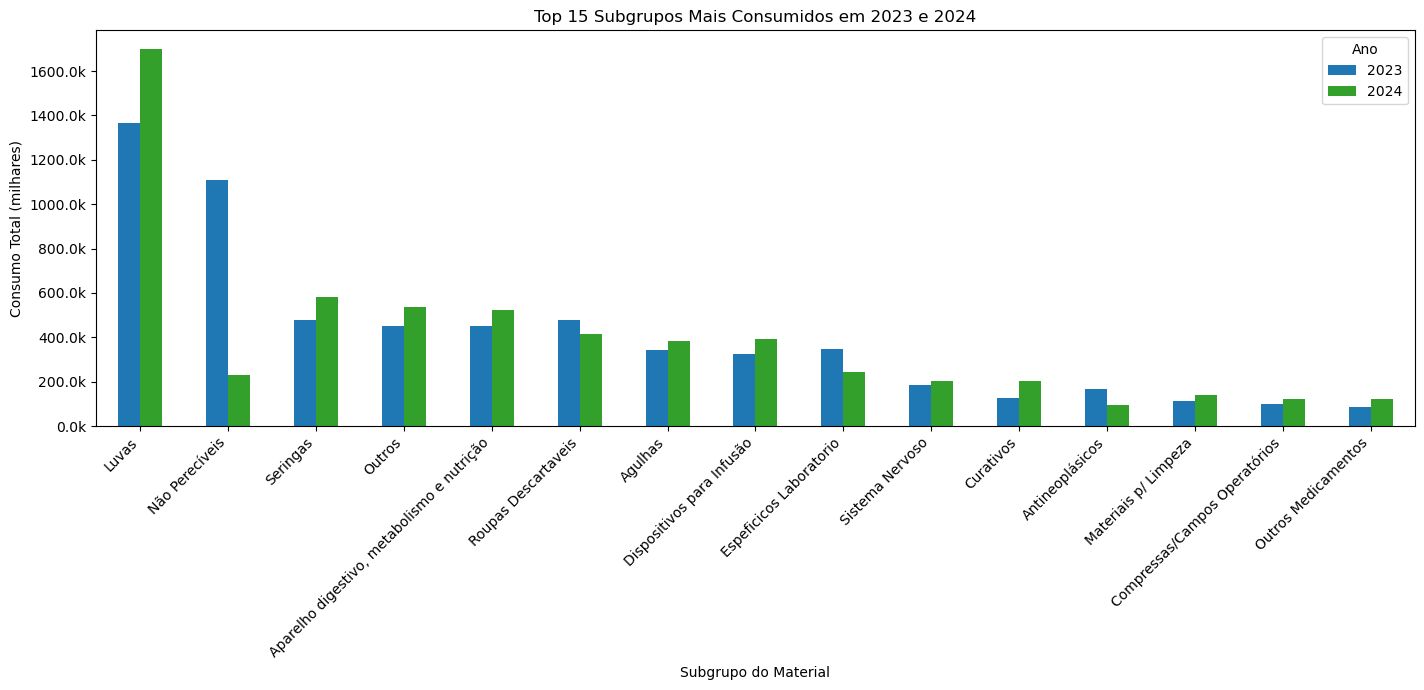

In [ ]:
# Apresentar os top 15 materiais (subgrupos) mais consumidos dos últimos anos (apresentando por ano)

# Extrai o ano da data de movimento
df_merged['ano'] = pd.to_datetime(df_merged['dt_movimento_estoque'], errors='coerce').dt.year

# Filtra apenas os anos de interesse
dados_filtrados = df_merged[df_merged['ano'].isin([2023, 2024])]

# Soma o consumo por subgrupo e ano
consumo_por_subgrupo = dados_filtrados.groupby(['ds_subgrupo_material', 'ano'])['qt_consumo'].sum().unstack(fill_value=0)

# Seleciona os 15 subgrupos com maior consumo total (soma dos anos)
top15_subgrupos = consumo_por_subgrupo.sum(axis=1).sort_values(ascending=False).head(15).index
consumo_top15 = consumo_por_subgrupo.loc[top15_subgrupos]

# Plota o gráfico
ax = consumo_top15.plot(kind='bar', figsize=(14,7), color=['#1f78b4', '#33a02c'])
plt.xlabel('Subgrupo do Material')
plt.ylabel('Consumo Total (milhares)')
plt.title('Top 15 Subgrupos Mais Consumidos em 2023 e 2024')
plt.legend(title='Ano')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Formata os valores do eixo y para milhares com 1 casa decimal
ax.yaxis.set_major_formatter(lambda x, pos: f'{x/1000:.1f}k')

plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\1051690584.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_por_subgrupo = dados_filtrados.groupby(['ds_subgrupo_material', 'ano'])['qt_consumo'].sum().unstack(fill_value=0)


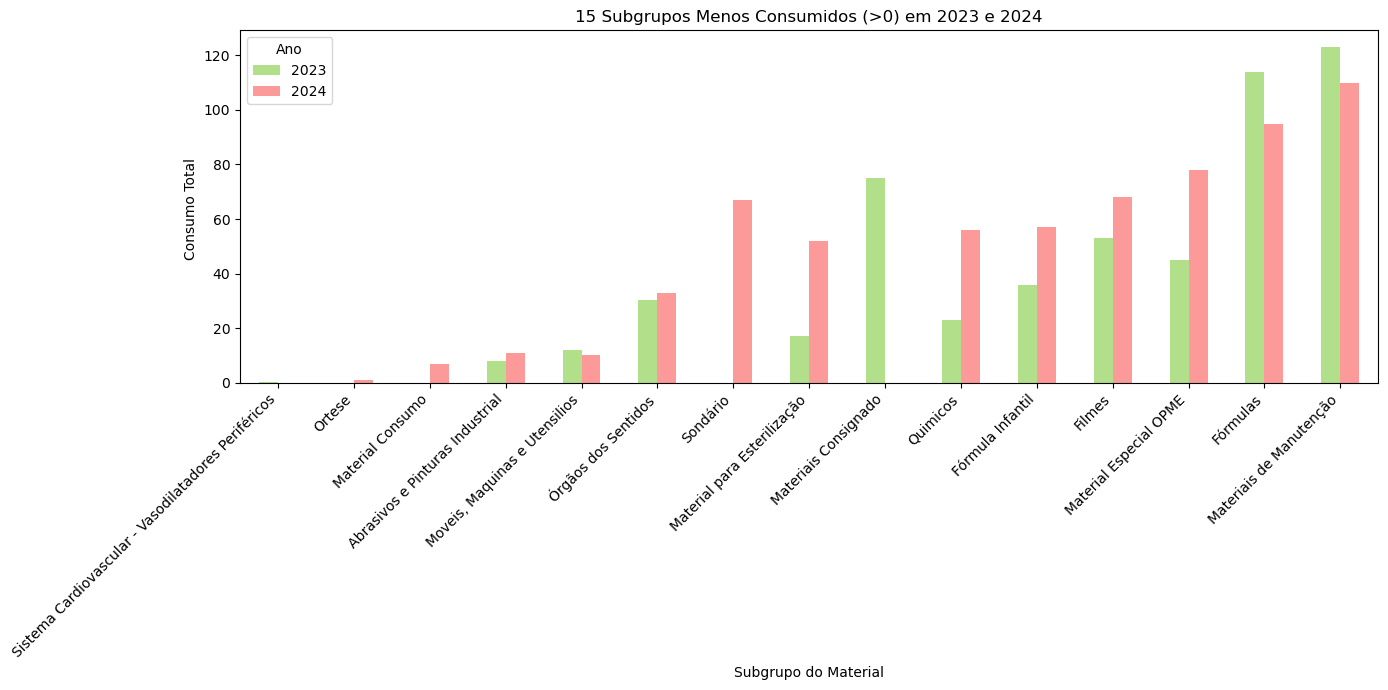

In [ ]:
# Apresentar os 15 materiais (subgrupos) menos consumidos dos últimos anos (apresentando por ano)

# Extrai o ano da data de movimento
df_merged['ano'] = pd.to_datetime(df_merged['dt_movimento_estoque'], errors='coerce').dt.year

# Filtra apenas os anos de interesse
dados_filtrados = df_merged[df_merged['ano'].isin([2023, 2024])]

# Soma o consumo por subgrupo e ano
consumo_por_subgrupo = dados_filtrados.groupby(['ds_subgrupo_material', 'ano'])['qt_consumo'].sum().unstack(fill_value=0)

# Exclui subgrupos com soma igual a zero
consumo_filtrado = consumo_por_subgrupo[consumo_por_subgrupo.sum(axis=1) > 0]

# Seleciona os 15 subgrupos com menor consumo total (>0)
bottom15_subgrupos = consumo_filtrado.sum(axis=1).sort_values(ascending=True).head(15).index
consumo_bottom15 = consumo_filtrado.loc[bottom15_subgrupos]

# Plota o gráfico
ax = consumo_bottom15.plot(kind='bar', figsize=(14,7), color=['#b2df8a', '#fb9a99'])
plt.xlabel('Subgrupo do Material')
plt.ylabel('Consumo Total ')
plt.title('15 Subgrupos Menos Consumidos (>0) em 2023 e 2024')
plt.legend(title='Ano')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Formata os valores do eixo y para milhares
#ax.yaxis.set_major_formatter(lambda x, pos: f'{int(x/1000):,}k')

plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\2681651071.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_especialidade = dados_filtrados.groupby(['ds_grupo_material', 'ano'])['qt_consumo'].sum().reset_index()


Número de especialidades acima da média: 5


C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\2681651071.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_especialidades = acima_media.groupby('ds_grupo_material')['qt_consumo'].sum().sort_values(ascending=False).head(num_especialidades).index


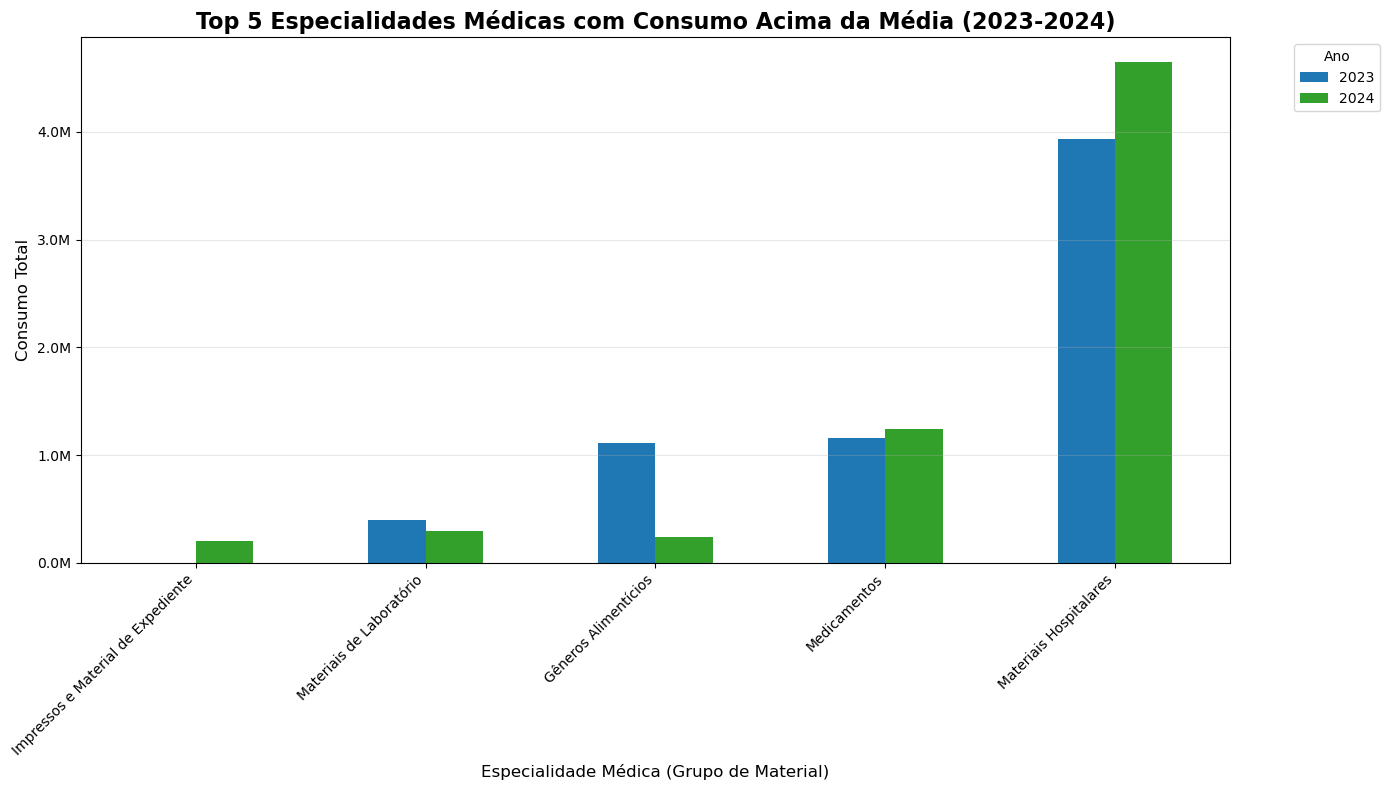

In [294]:
# Selecionar algumas especialidades médicas com consumos acima da média dos últimos anos (apresentando por ano)

# Extrai o ano
df_merged['ano'] = pd.to_datetime(df_merged['dt_movimento_estoque'], errors='coerce').dt.year

# Filtra apenas os anos 2023 e 2024
dados_filtrados = df_merged[df_merged['ano'].isin([2023, 2024])]

# Agrupa por especialidade médica e ano, somando o consumo
consumo_especialidade = dados_filtrados.groupby(['ds_grupo_material', 'ano'])['qt_consumo'].sum().reset_index()

# Calcula a média de consumo por ano (considerando todas as especialidades)
media_anual = consumo_especialidade.groupby('ano')['qt_consumo'].mean()

# Adiciona a média anual ao dataframe
consumo_especialidade = consumo_especialidade.merge(
    media_anual.reset_index().rename(columns={'qt_consumo': 'media_ano'}), 
    on='ano'
)

# Filtra especialidades com consumo acima da média
acima_media = consumo_especialidade[consumo_especialidade['qt_consumo'] > consumo_especialidade['media_ano']]

# Primeiro, vamos ver quantas especialidades temos acima da média
print(f"Número de especialidades acima da média: {acima_media['ds_grupo_material'].nunique()}")

# Se temos menos de 8, ajustamos o título e pegamos todas disponíveis
num_especialidades = min(8, acima_media['ds_grupo_material'].nunique())

# Seleciona as especialidades com maior consumo total
top_especialidades = acima_media.groupby('ds_grupo_material')['qt_consumo'].sum().sort_values(ascending=False).head(num_especialidades).index
acima_media_filtrado = acima_media[acima_media['ds_grupo_material'].isin(top_especialidades)]

# Cria pivot para o gráfico
pivot_especialidades = acima_media_filtrado.pivot(
    index='ds_grupo_material', 
    columns='ano', 
    values='qt_consumo'
).fillna(0)

#Ordena o pivot em ordem CRESCENTE baseado na soma total
pivot_especialidades['total'] = pivot_especialidades.sum(axis=1)
pivot_especialidades = pivot_especialidades.sort_values('total', ascending=True)
pivot_especialidades = pivot_especialidades.drop('total', axis=1)  


# Gráfico de barras simples
fig, ax = plt.subplots(figsize=(14, 8))
pivot_especialidades.plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'])

# Ajusta o título baseado no número real de especialidades
titulo = f'Top {num_especialidades} Especialidades Médicas com Consumo Acima da Média (2023-2024)'
plt.title(titulo, fontsize=16, fontweight='bold')
plt.xlabel('Especialidade Médica (Grupo de Material)', fontsize=12)
plt.ylabel('Consumo Total', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Formatação em MILHÕES - valores de 201k a 4,6M
ax.yaxis.set_major_formatter(lambda x, pos: f'{x/1000000:.1f}M')

plt.tight_layout()

plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\2157121170.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parados_por_subgrupo_ano = estoque_parado.groupby(['ds_subgrupo_material', 'ano']).size().reset_index(name='qtd_itens_parados')
C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\2157121170.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_parados_por_subgrupo = parados_por_subgrupo_ano.groupby('ds_subgrupo_material')['qtd_itens_parados'].sum().sort_values(ascending=False)


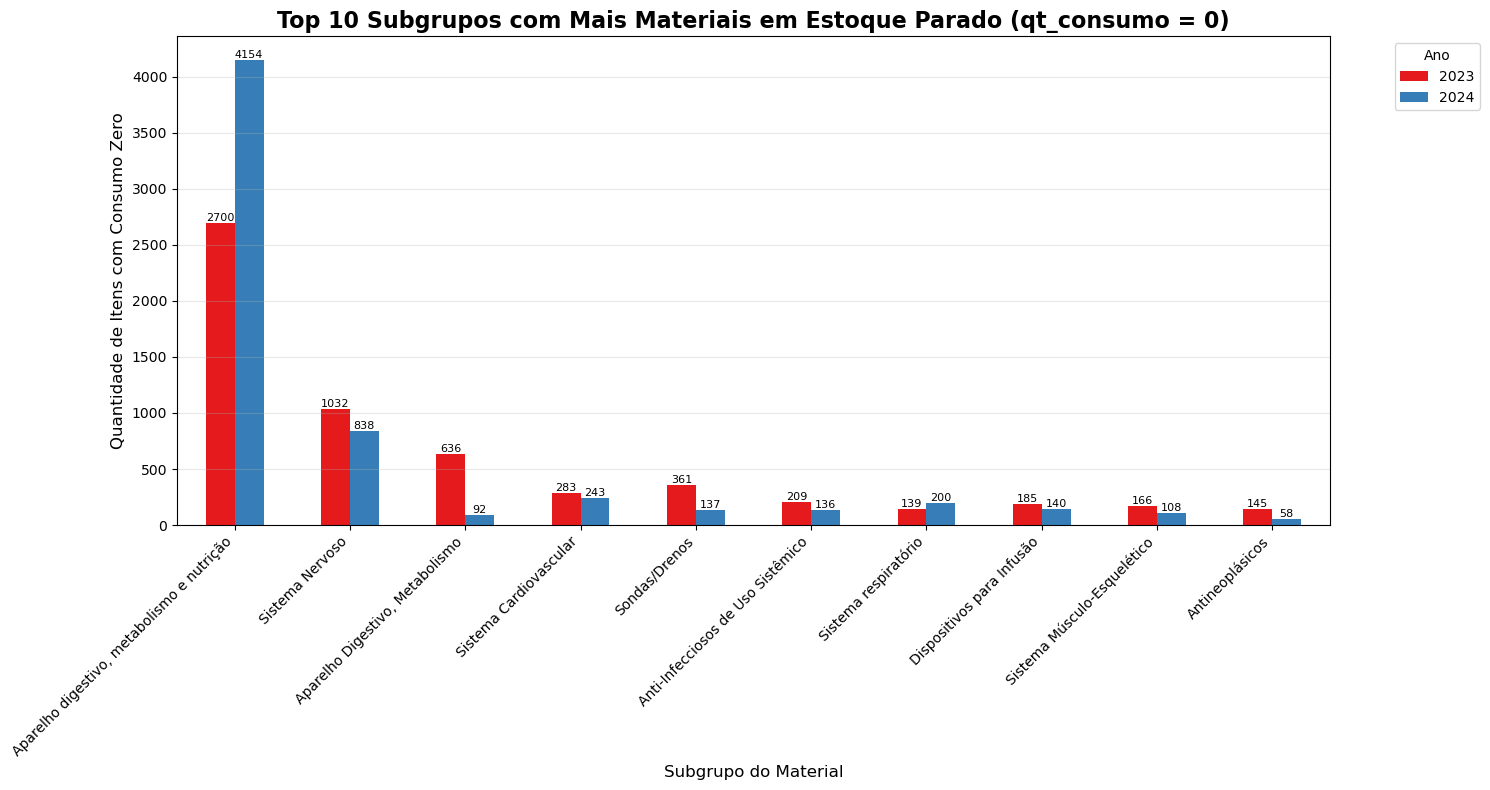

In [295]:
# Apresentar materiais com estoques parados nos últimos anos (apresentando por ano)
# Identificando subgrupos com qt_consumo = 0 (estoque parado)

# Extrai o ano da data de movimento
df_merged['ano'] = pd.to_datetime(df_merged['dt_movimento_estoque'], errors='coerce').dt.year

# Filtra registros com qt_consumo = 0 (estoque parado)
estoque_parado = df_merged[df_merged['qt_consumo'] == 0]

# Conta quantos itens de cada subgrupo têm consumo zero por ano
parados_por_subgrupo_ano = estoque_parado.groupby(['ds_subgrupo_material', 'ano']).size().reset_index(name='qtd_itens_parados')

# Agrupa por subgrupo para encontrar os que mais têm itens parados
total_parados_por_subgrupo = parados_por_subgrupo_ano.groupby('ds_subgrupo_material')['qtd_itens_parados'].sum().sort_values(ascending=False)

# Seleciona os top 10 subgrupos com mais itens parados
top10_subgrupos_parados = total_parados_por_subgrupo.head(10).index

# Filtra dados para os top 10 subgrupos
dados_top10 = parados_por_subgrupo_ano[parados_por_subgrupo_ano['ds_subgrupo_material'].isin(top10_subgrupos_parados)]

# Cria pivot para visualização
pivot_parados = dados_top10.pivot(
    index='ds_subgrupo_material',
    columns='ano',
    values='qtd_itens_parados'
).fillna(0)

# Garante ordem decrescente baseada no total
pivot_parados = pivot_parados.loc[top10_subgrupos_parados]

# Plota o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(15, 8))
pivot_parados.plot(kind='bar', ax=ax, color=['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00'])

plt.title('Top 10 Subgrupos com Mais Materiais em Estoque Parado (qt_consumo = 0)', fontsize=16, fontweight='bold')
plt.xlabel('Subgrupo do Material', fontsize=12)
plt.ylabel('Quantidade de Itens com Consumo Zero', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Adiciona valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', rotation=0, fontsize=8)

plt.tight_layout()
plt.show()



## Extrair mais 3 principais informações da base e elaborem os gráficos para visualizá-las. Cada código em uma célula separada

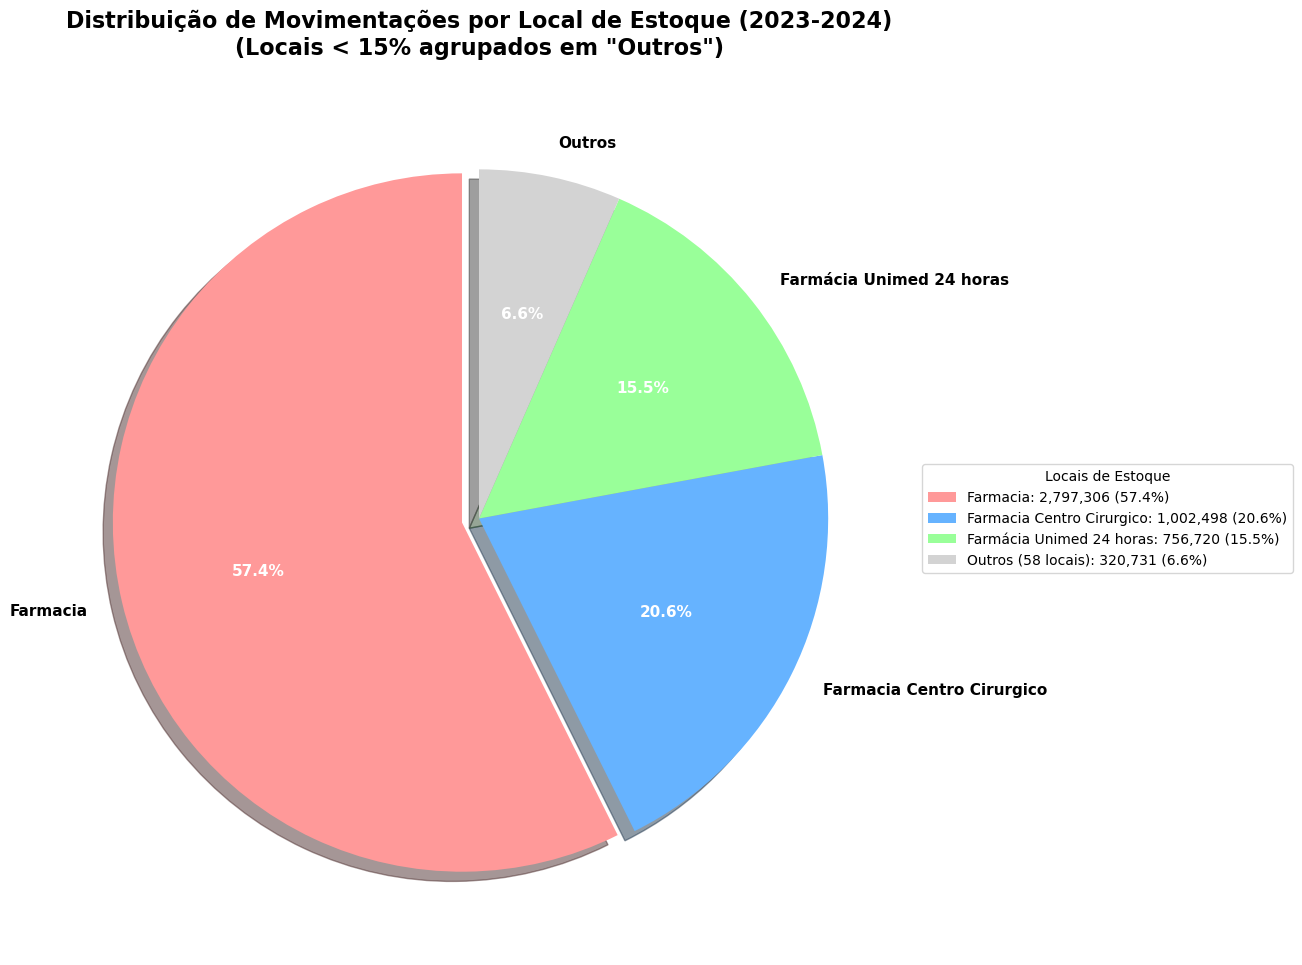

In [263]:
# Gráfico em pizza mostrando os locais com mais movimentações nos últimos anos
# Agrupando locais com menos de 15% como "Outros"

# Extrai o ano da data de movimento
movimentacoes['ano'] = pd.to_datetime(movimentacoes['dt_movimento_estoque'], errors='coerce').dt.year

# Filtra os últimos anos (2023 e 2024)
dados_ultimos_anos = movimentacoes[movimentacoes['ano'].isin([2023, 2024])]

# Conta o número de movimentações por local de estoque
contagem_local_completa = dados_ultimos_anos['ds_local_estoque'].value_counts()

# Calcula percentuais para todos os locais
total_movimentacoes = contagem_local_completa.sum()
percentuais_completos = (contagem_local_completa / total_movimentacoes * 100).round(1)

# Separa locais com 15% ou mais e os menores que 15%
locais_principais = contagem_local_completa[percentuais_completos >= 15.0]
locais_outros = contagem_local_completa[percentuais_completos < 15.0]


# Cria os dados finais para o gráfico
dados_grafico = locais_principais.copy()

# Adiciona "Outros" se existirem locais menores
if len(locais_outros) > 0:
    outros_total = locais_outros.sum()
    dados_grafico['Outros'] = outros_total

# Calcula percentuais finais
percentuais_finais = (dados_grafico / total_movimentacoes * 100).round(1)



# Cores para o gráfico
cores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', 
         '#c2c2f0', '#ffb3e6', '#c4e17f', '#ffc658']

# Se "Outros" existe, última cor será cinza
if 'Outros' in dados_grafico.index:
    cores = cores[:len(dados_grafico)-1] + ['#d3d3d3']
else:
    cores = cores[:len(dados_grafico)]

# Cria o gráfico de pizza
fig, ax = plt.subplots(figsize=(12, 10))

# Destaque para o maior (que não seja "Outros")
explode = []
for i, local in enumerate(dados_grafico.index):
    if i == 0 and local != 'Outros':
        explode.append(0.05)
    else:
        explode.append(0)

# Plota o gráfico
wedges, texts, autotexts = ax.pie(
    dados_grafico.values,
    labels=dados_grafico.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    explode=explode,
    shadow=True
)

# Personaliza textos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

# Título
plt.title('Distribuição de Movimentações por Local de Estoque (2023-2024)\n(Locais < 15% agrupados em "Outros")', 
          fontsize=16, fontweight='bold', pad=20)

# Legenda
legend_labels = []
for local in dados_grafico.index:
    valor = dados_grafico[local]
    percentual = percentuais_finais[local]
    if local == 'Outros':
        qtd_locais = len(locais_outros)
        legend_labels.append(f'{local} ({qtd_locais} locais): {valor:,.0f} ({percentual:.1f}%)')
    else:
        legend_labels.append(f'{local}: {valor:,.0f} ({percentual:.1f}%)')

plt.legend(wedges, legend_labels, 
          title="Locais de Estoque",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.tight_layout()
plt.show()



C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\3588202216.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valor_por_centro_custo = dados_ultimos_anos.groupby('ds_centro_custo')['vl_movimento'].sum().sort_values(ascending=False)


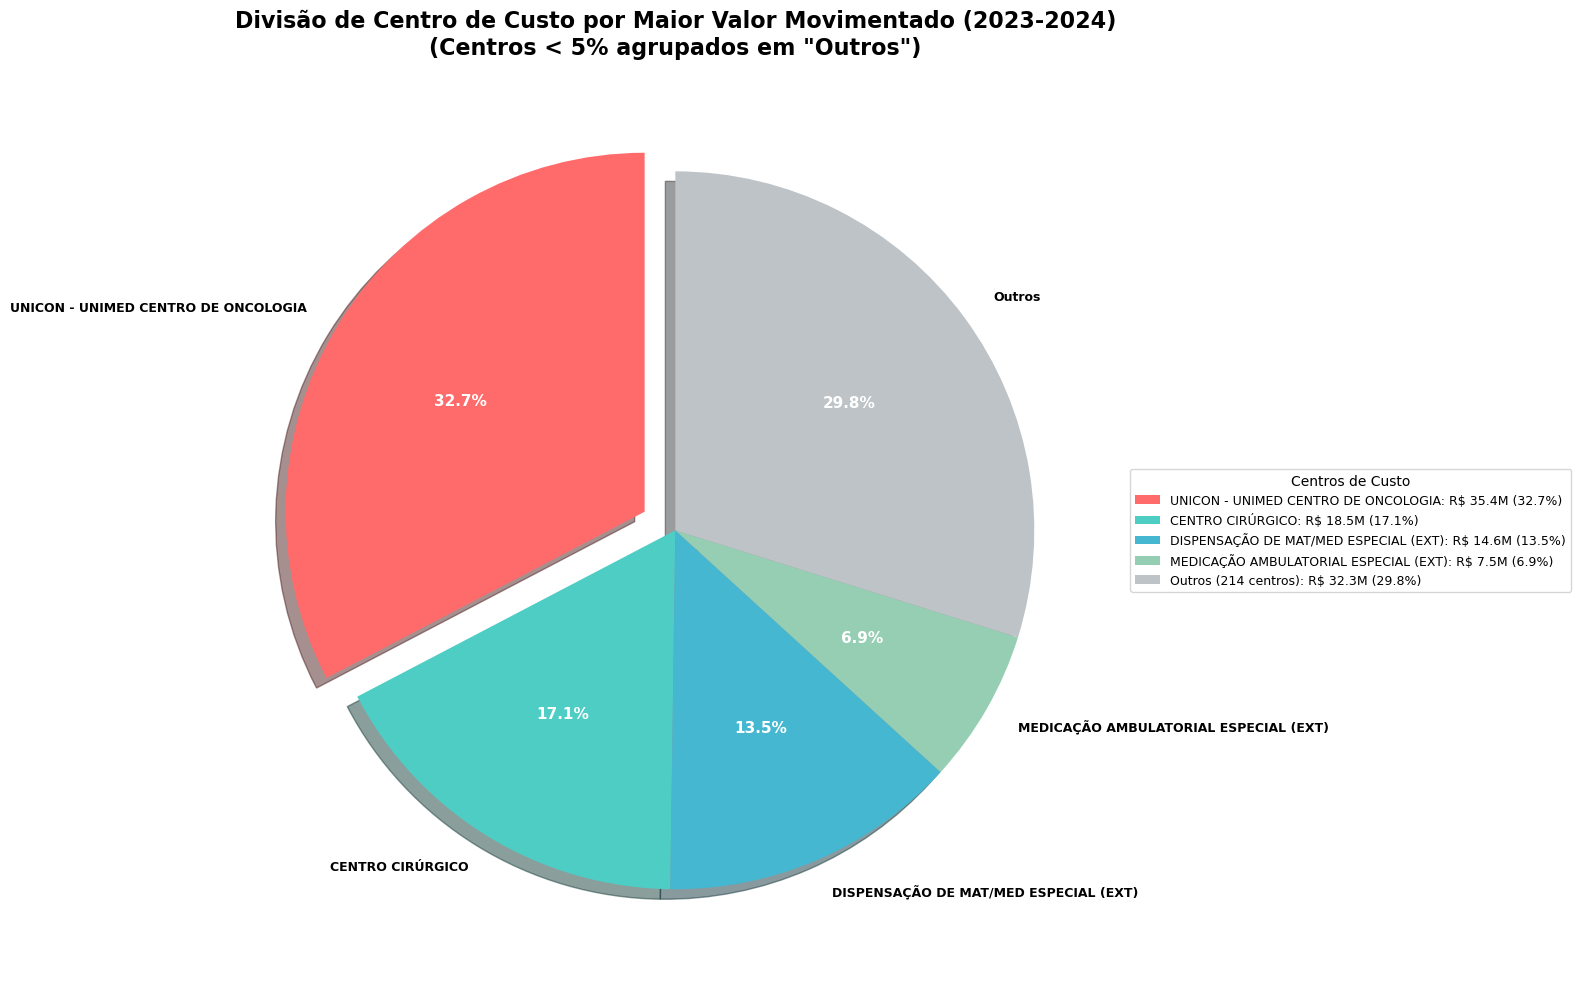

In [273]:
# Gráfico em pizza mostrando a divisão de centro de custo por maior valor movimentado

# Filtra os últimos anos (2023 e 2024)
movimentacoes['ano'] = pd.to_datetime(movimentacoes['dt_movimento_estoque'], errors='coerce').dt.year
dados_ultimos_anos = movimentacoes[movimentacoes['ano'].isin([2023, 2024])]

# Soma o valor movimentado por centro de custo
valor_por_centro_custo = dados_ultimos_anos.groupby('ds_centro_custo')['vl_movimento'].sum().sort_values(ascending=False)

# Calcula percentuais para todos os centros de custo
total_valor = valor_por_centro_custo.sum()
percentuais_completos = (valor_por_centro_custo / total_valor * 100).round(1)

# Separa centros de custo com 5% ou mais e os menores que 5%
centros_principais = valor_por_centro_custo[percentuais_completos >= 5.0]
centros_outros = valor_por_centro_custo[percentuais_completos < 5.0]

# Cria os dados finais para o gráfico
dados_grafico = centros_principais.copy()

# Adiciona "Outros" se existirem centros menores
if len(centros_outros) > 0:
    outros_total = centros_outros.sum()
    dados_grafico['Outros'] = outros_total

# Calcula percentuais finais
percentuais_finais = (dados_grafico / total_valor * 100).round(1)

# Cores para o gráfico
cores = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#ffeaa7', 
         '#dda0dd', '#98d8c8', '#f7dc6f', '#bb8fce', '#85c1e9']

# Se "Outros" existe, última cor será cinza
if 'Outros' in dados_grafico.index:
    cores = cores[:len(dados_grafico)-1] + ['#bdc3c7']
else:
    cores = cores[:len(dados_grafico)]

# Cria o gráfico de pizza
fig, ax = plt.subplots(figsize=(14, 10))

# Destaque para o maior centro de custo
explode = []
for i, centro in enumerate(dados_grafico.index):
    if i == 0 and centro != 'Outros':
        explode.append(0.1)
    else:
        explode.append(0)

# Plota o gráfico
wedges, texts, autotexts = ax.pie(
    dados_grafico.values,
    labels=dados_grafico.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 10}
)

# Personaliza textos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

for text in texts:
    text.set_fontsize(9)
    text.set_fontweight('bold')

# Título
plt.title('Divisão de Centro de Custo por Maior Valor Movimentado (2023-2024)\n(Centros < 5% agrupados em "Outros")', 
          fontsize=16, fontweight='bold', pad=20)

# Legenda detalhada
legend_labels = []
for centro in dados_grafico.index:
    valor = dados_grafico[centro]
    percentual = percentuais_finais[centro]
    if centro == 'Outros':
        qtd_centros = len(centros_outros)
        legend_labels.append(f'{centro} ({qtd_centros} centros): R$ {valor/1000000:.1f}M ({percentual:.1f}%)')
    else:
        legend_labels.append(f'{centro}: R$ {valor/1000000:.1f}M ({percentual:.1f}%)')

plt.legend(wedges, legend_labels, 
          title="Centros de Custo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=9)

plt.tight_layout()
plt.show()



C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\2844258786.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['ano_mes'] = dados_filtrados['dt_movimento_estoque'].dt.to_period('M')


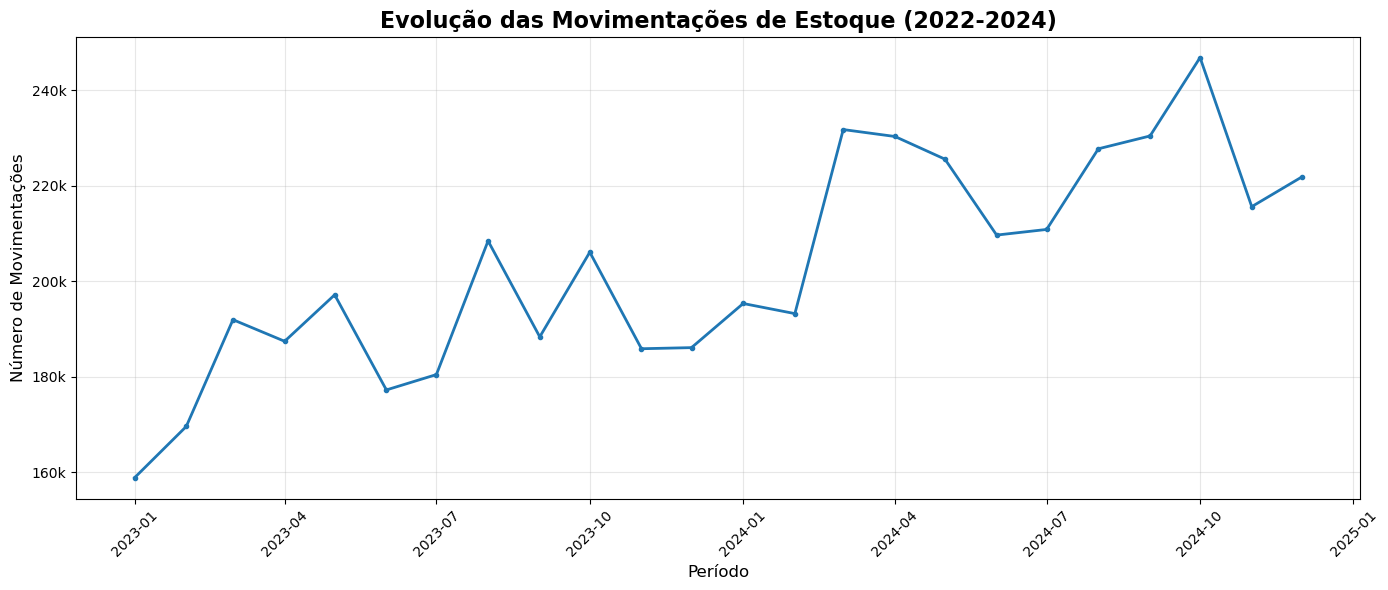

In [297]:
# Gráfico de linha mostrando os períodos com mais movimentações (2023-2024)

# Garantir que a coluna de data está no formato datetime
movimentacoes['dt_movimento_estoque'] = pd.to_datetime(movimentacoes['dt_movimento_estoque'], errors='coerce')

# Remove registros com datas nulas
dados_com_data = movimentacoes[movimentacoes['dt_movimento_estoque'].notna()].copy()

# Filtra apenas 2023-2024
dados_com_data['ano'] = dados_com_data['dt_movimento_estoque'].dt.year
dados_filtrados = dados_com_data[dados_com_data['ano'].isin([2023, 2024])]

# Cria uma coluna com ano-mês para agrupamento mensal
dados_filtrados['ano_mes'] = dados_filtrados['dt_movimento_estoque'].dt.to_period('M')

# Conta o número de movimentações por mês
movimentacoes_por_mes = dados_filtrados.groupby('ano_mes').size()

# Converte o período de volta para datetime para melhor visualização
movimentacoes_por_mes.index = movimentacoes_por_mes.index.to_timestamp()

# Cria o gráfico de linha
fig, ax = plt.subplots(figsize=(14, 6))

# Plota a linha principal
ax.plot(movimentacoes_por_mes.index, movimentacoes_por_mes.values, 
        linewidth=2, color='#1f77b4', marker='o', markersize=3)

# Personalização do gráfico
plt.title('Evolução das Movimentações de Estoque (2022-2024)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Período', fontsize=12)
plt.ylabel('Número de Movimentações', fontsize=12)

# Formatação do eixo Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}k'))

# Formatação do eixo X
ax.tick_params(axis='x', rotation=45, labelsize=10)

# Grade
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

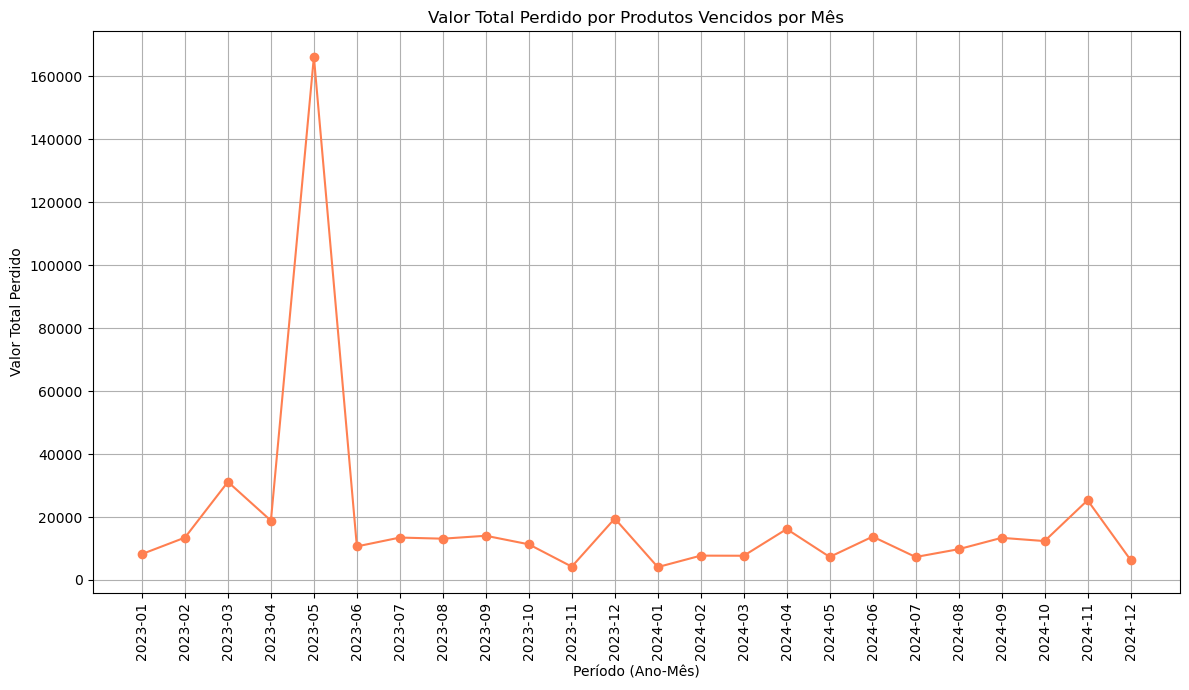

In [299]:
# Filtrar para a operação 'Produtos vencidos'
df_vencidos_operacao = df_merged[df_merged['ds_operacao'] == 'Produtos vencidos'].copy()

# Criar uma coluna combinando Ano e Mês para análise temporal
df_vencidos_operacao['ano_mes'] = df_vencidos_operacao['dt_movimento_estoque'].dt.to_period('M').astype(str)

# Agrupar por Ano-Mês e somar o vl_movimento
desperdicio_vencidos_por_mes = df_vencidos_operacao.groupby('ano_mes')['vl_movimento'].sum().reset_index()

# Ordenar por ano_mes para garantir a ordem correta no gráfico
desperdicio_vencidos_por_mes = desperdicio_vencidos_por_mes.sort_values(by='ano_mes')



# Criar o gráfico de linhas
plt.figure(figsize=(12, 7))
plt.plot(desperdicio_vencidos_por_mes['ano_mes'], desperdicio_vencidos_por_mes['vl_movimento'], marker='o', linestyle='-', color='coral')
plt.title('Valor Total Perdido por Produtos Vencidos por Mês')
plt.xlabel('Período (Ano-Mês)')
plt.ylabel('Valor Total Perdido')
plt.xticks(rotation=90) # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(True)
plt.tight_layout()
plt.show()